In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/README.dataset.txt
/kaggle/input/dataset/README.roboflow.txt
/kaggle/input/dataset/data.yaml
/kaggle/input/dataset/valid/labels/construction-711-_jpg.rf.36f96b2dff257f73705861e4c3153d8c.txt
/kaggle/input/dataset/valid/labels/-211-_png_jpg.rf.63b7213fc11cd2d7db6d8fff0e490d2c.txt
/kaggle/input/dataset/valid/labels/-1079-_png_jpg.rf.77459a818bed5a44927d46bdb976c661.txt
/kaggle/input/dataset/valid/labels/construction-2-_mp4-38_jpg.rf.1da49759ed25e44fe20c74fc32e8af3b.txt
/kaggle/input/dataset/valid/labels/construction-1-_mp4-147_jpg.rf.6593d553fd4c445c810aedcc8f9bf5b0.txt
/kaggle/input/dataset/valid/labels/construction-274-_jpg.rf.7bcf863d4700f5ad5e95321f0e569d80.txt
/kaggle/input/dataset/valid/labels/youtube-619_jpg.rf.acaa28bf8879aa2ebc6330470d4eef72.txt
/kaggle/input/dataset/valid/labels/youtube-118_jpg.rf.604681100088830b9c8de1bd498984c3.txt
/kaggle/input/dataset/valid/labels/construction-4-_mp4-20_jpg.rf.8b3b9e107fdf02c01246518f001cc0a6.txt
/kaggle/input/dataset/v

In [2]:
from IPython.display import Image, clear_output  # to display images
from IPython.display import Image

In [3]:
# from zipfile import ZipFile

# # Create a ZipFile object
# path = "/kaggle/input/construction-site-safety/"
# zip_file = ZipFile(path)

# # Extract the contents of the zip file
# zip_file.extractall(f"{path}/data")

# # Close the ZipFile object
# zip_file.close()

In [1]:
!pip install ultralytics==8.0.26

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.6/271.6 kB 5.2 MB/s eta 0:00:0000:01


In [ ]:
# !yolo predict model=yolov8n.pt source='https://ultralytics.com/images/bus.jpg'

In [2]:
%cat /kaggle/input/dataset/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 25
names: ['Excavator', 'Gloves', 'Hardhat', 'Ladder', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'SUV', 'Safety Cone', 'Safety Vest', 'bus', 'dump truck', 'fire hydrant', 'machinery', 'mini-van', 'sedan', 'semi', 'trailer', 'truck and trailer', 'truck', 'van', 'vehicle', 'wheel loader']

roboflow:
  workspace: roboflow-universe-projects
  project: construction-site-safety
  version: 30
  license: CC BY 4.0
  url: https://universe.roboflow.com/roboflow-universe-projects/construction-site-safety/dataset/30

In [3]:
# define number of classes based on YAML
import yaml
get_yaml_file = "/kaggle/input/dataset/data.yaml"
with open(get_yaml_file, 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [4]:
#this is the model configuration we will use for our tutorial
%cd /kaggle/input/dataset/data.yaml
%cat data.yaml

[Errno 20] Not a directory: '/kaggle/input/dataset/data.yaml'
/kaggle/working

path: /kaggle/input/construction-site-safety/Construction Site Safety
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 25
names: ['Excavator', 'Gloves', 'Hardhat', 'Ladder', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'SUV', 'Safety Cone', 'Safety Vest', 'bus', 'dump truck', 'fire hydrant', 'machinery', 'mini-van', 'sedan', 'semi', 'trailer', 'truck and trailer', 'truck', 'van', 'vehicle', 'wheel loader']

roboflow:
  workspace: roboflow-universe-projects
  project: construction-site-safety
  version: 30
  license: CC BY 4.0
  url: https://universe.roboflow.com/roboflow-universe-projects/construction-site-safety/dataset/30


In [5]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [6]:
%%writetemplate /kaggle/working/Custom_data.yaml

path: /kaggle/input/dataset
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 25
names: ['Excavator', 'Gloves', 'Hardhat', 'Ladder', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'SUV', 'Safety Cone', 'Safety Vest', 'bus', 'dump truck', 'fire hydrant', 'machinery', 'mini-van', 'sedan', 'semi', 'trailer', 'truck and trailer', 'truck', 'van', 'vehicle', 'wheel loader']

roboflow:
  workspace: roboflow-universe-projects
  project: construction-site-safety
  version: 30
  license: CC BY 4.0
  url: https://universe.roboflow.com/roboflow-universe-projects/construction-site-safety/dataset/30

In [7]:
%cd /kaggle/working/

/kaggle/working


In [8]:
# desabling the option to chose so that it wont interrupt training the model
!wandb disabled

W&B disabled.


In [9]:
import torch
torch.cuda.empty_cache()

In [10]:
# Build a new model from YAML and start training from scratch
# yaml_file = "/kaggle/working/data.yaml" # created a copy of the file and paste it into output folder in order to read and write permissions
# !yolo task=detect mode=train data="data.yaml" model=yolov8l.yaml epochs=250 imgsz=640
!yolo task=detect mode=train data="Custom_data.yaml" model=yolov8l.yaml epochs=1000 imgsz=640


                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.Conv                  [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.C2f                   [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.C2f                   [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.Conv                  [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.C2f                   [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics.nn.modules.Conv                  [512

In [11]:
# import shutil as sh
# import os

# PATH = r"/kaggle/working/runs/detect/"

# sh.rmtree(PATH)

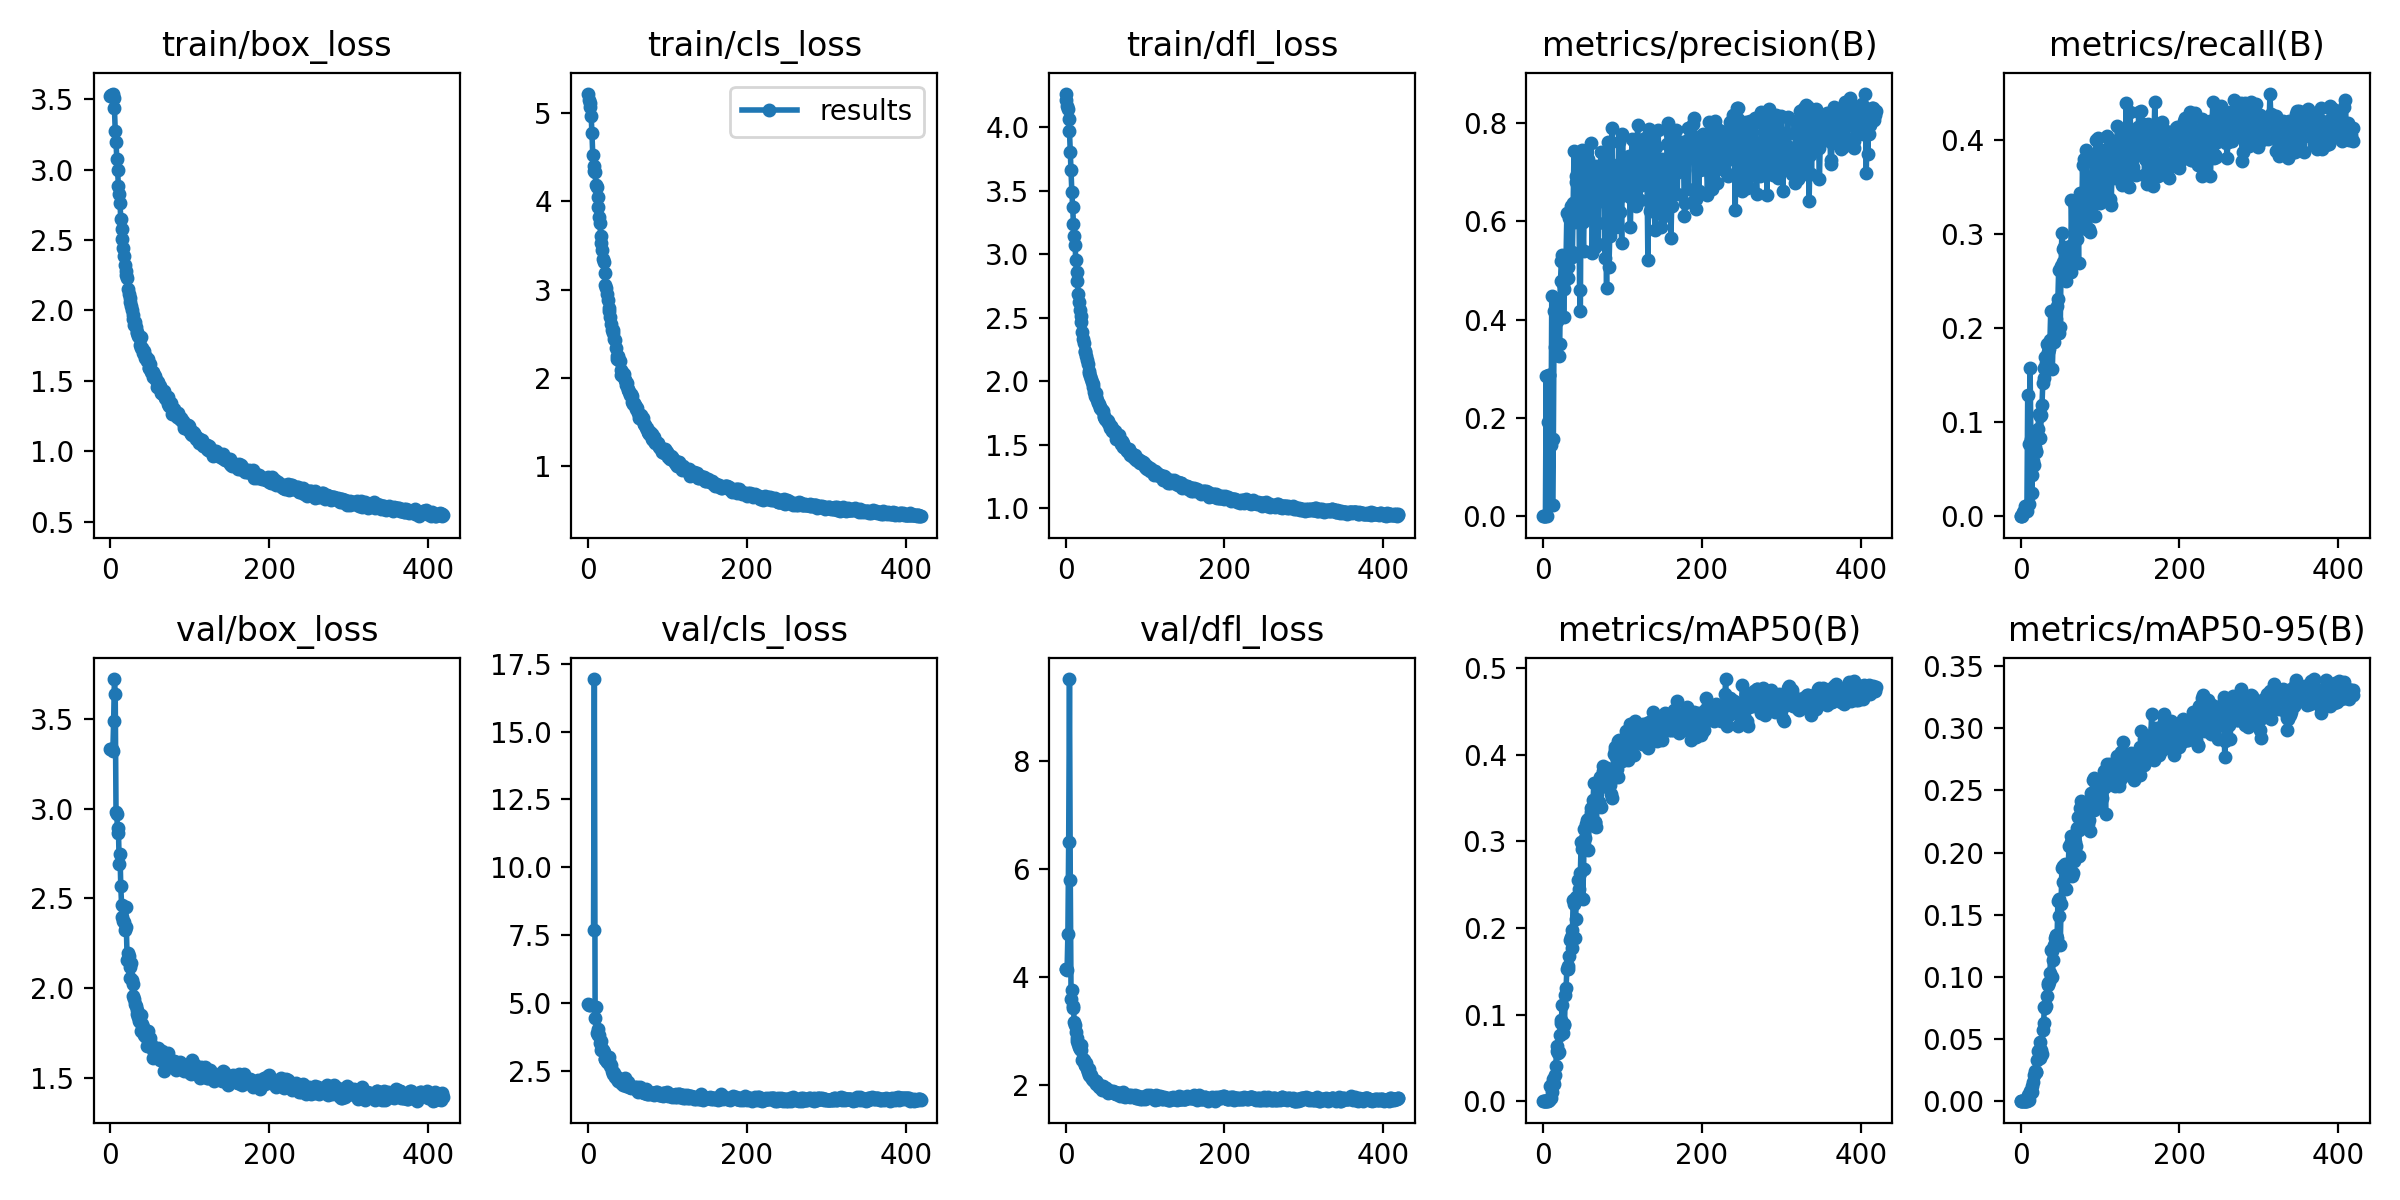

In [17]:
# from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='//kaggle/working/runs/detect/train3/results.png', width=1000)  # view results.png

In [2]:
import matplotlib as plt
import pandas as pd

data = pd.read_csv("/kaggle/working/runs/detect/train/results.csv")
data.head()

epoch        train/box_loss        train/cls_loss  \
0                     1                3.5250                5.1447   
1                     2                3.5146                4.8509   
2                     3                3.4335                4.4245   
3                     4                3.3169                4.3310   
4                     5                3.2478                4.1965   

         train/dfl_loss  metrics/precision(B)     metrics/recall(B)  \
0                4.2444               0.00000               0.00000   
1                4.1218               0.00047               0.03210   
2                3.9357               0.00010               0.00733   
3                3.8195               0.00271               0.04439   
4                3.7081               0.43477               0.00777   

       metrics/mAP50(B)   metrics/mAP50-95(B)          val/box_loss  \
0               0.00000               0.00000                3.3289   
1               0.00068               0.00025                3.2840   
2               0.00013               0.00002                3.5293   
3               0.00209               0.00064                3.3843   
4               0.00434               0.00137                3.0056   

           val/cls_loss          val/dfl_loss                lr/pg0  \
0                4.9405                4.1530              0.000110   
1                4.8175                4.1311              0.000224   
2                6.2191                4.5063              0.000337   
3                5.1073                4.1873              0.000344   
4                4.0012                3.7185              0.000344   

                 lr/pg1                lr/pg2  
0              0.000110              0.000110  
1              0.000224              0.000224  
2              0.000337              0.000337  
3              0.000344              0.000344  
4              0.000344              0.000344

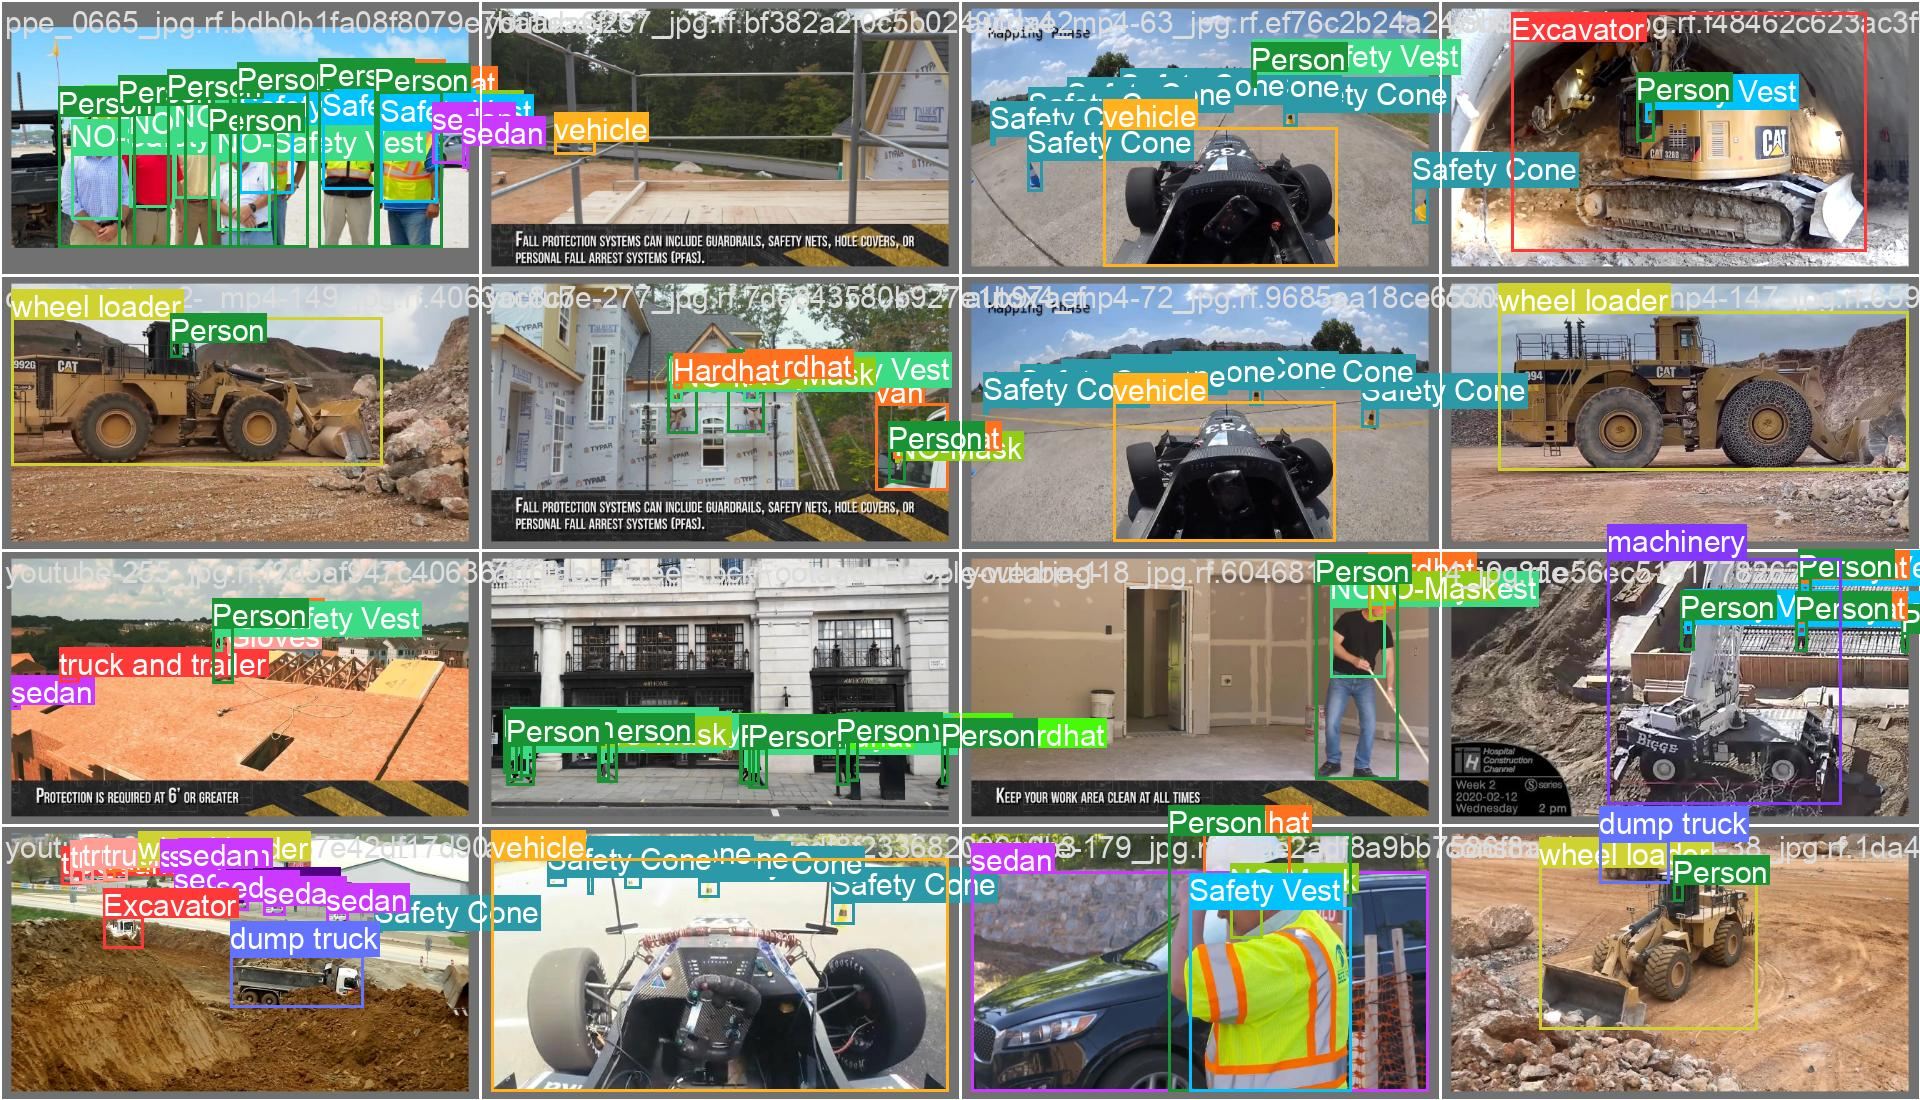

In [3]:
Image(filename='/kaggle/working/runs/detect/train/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


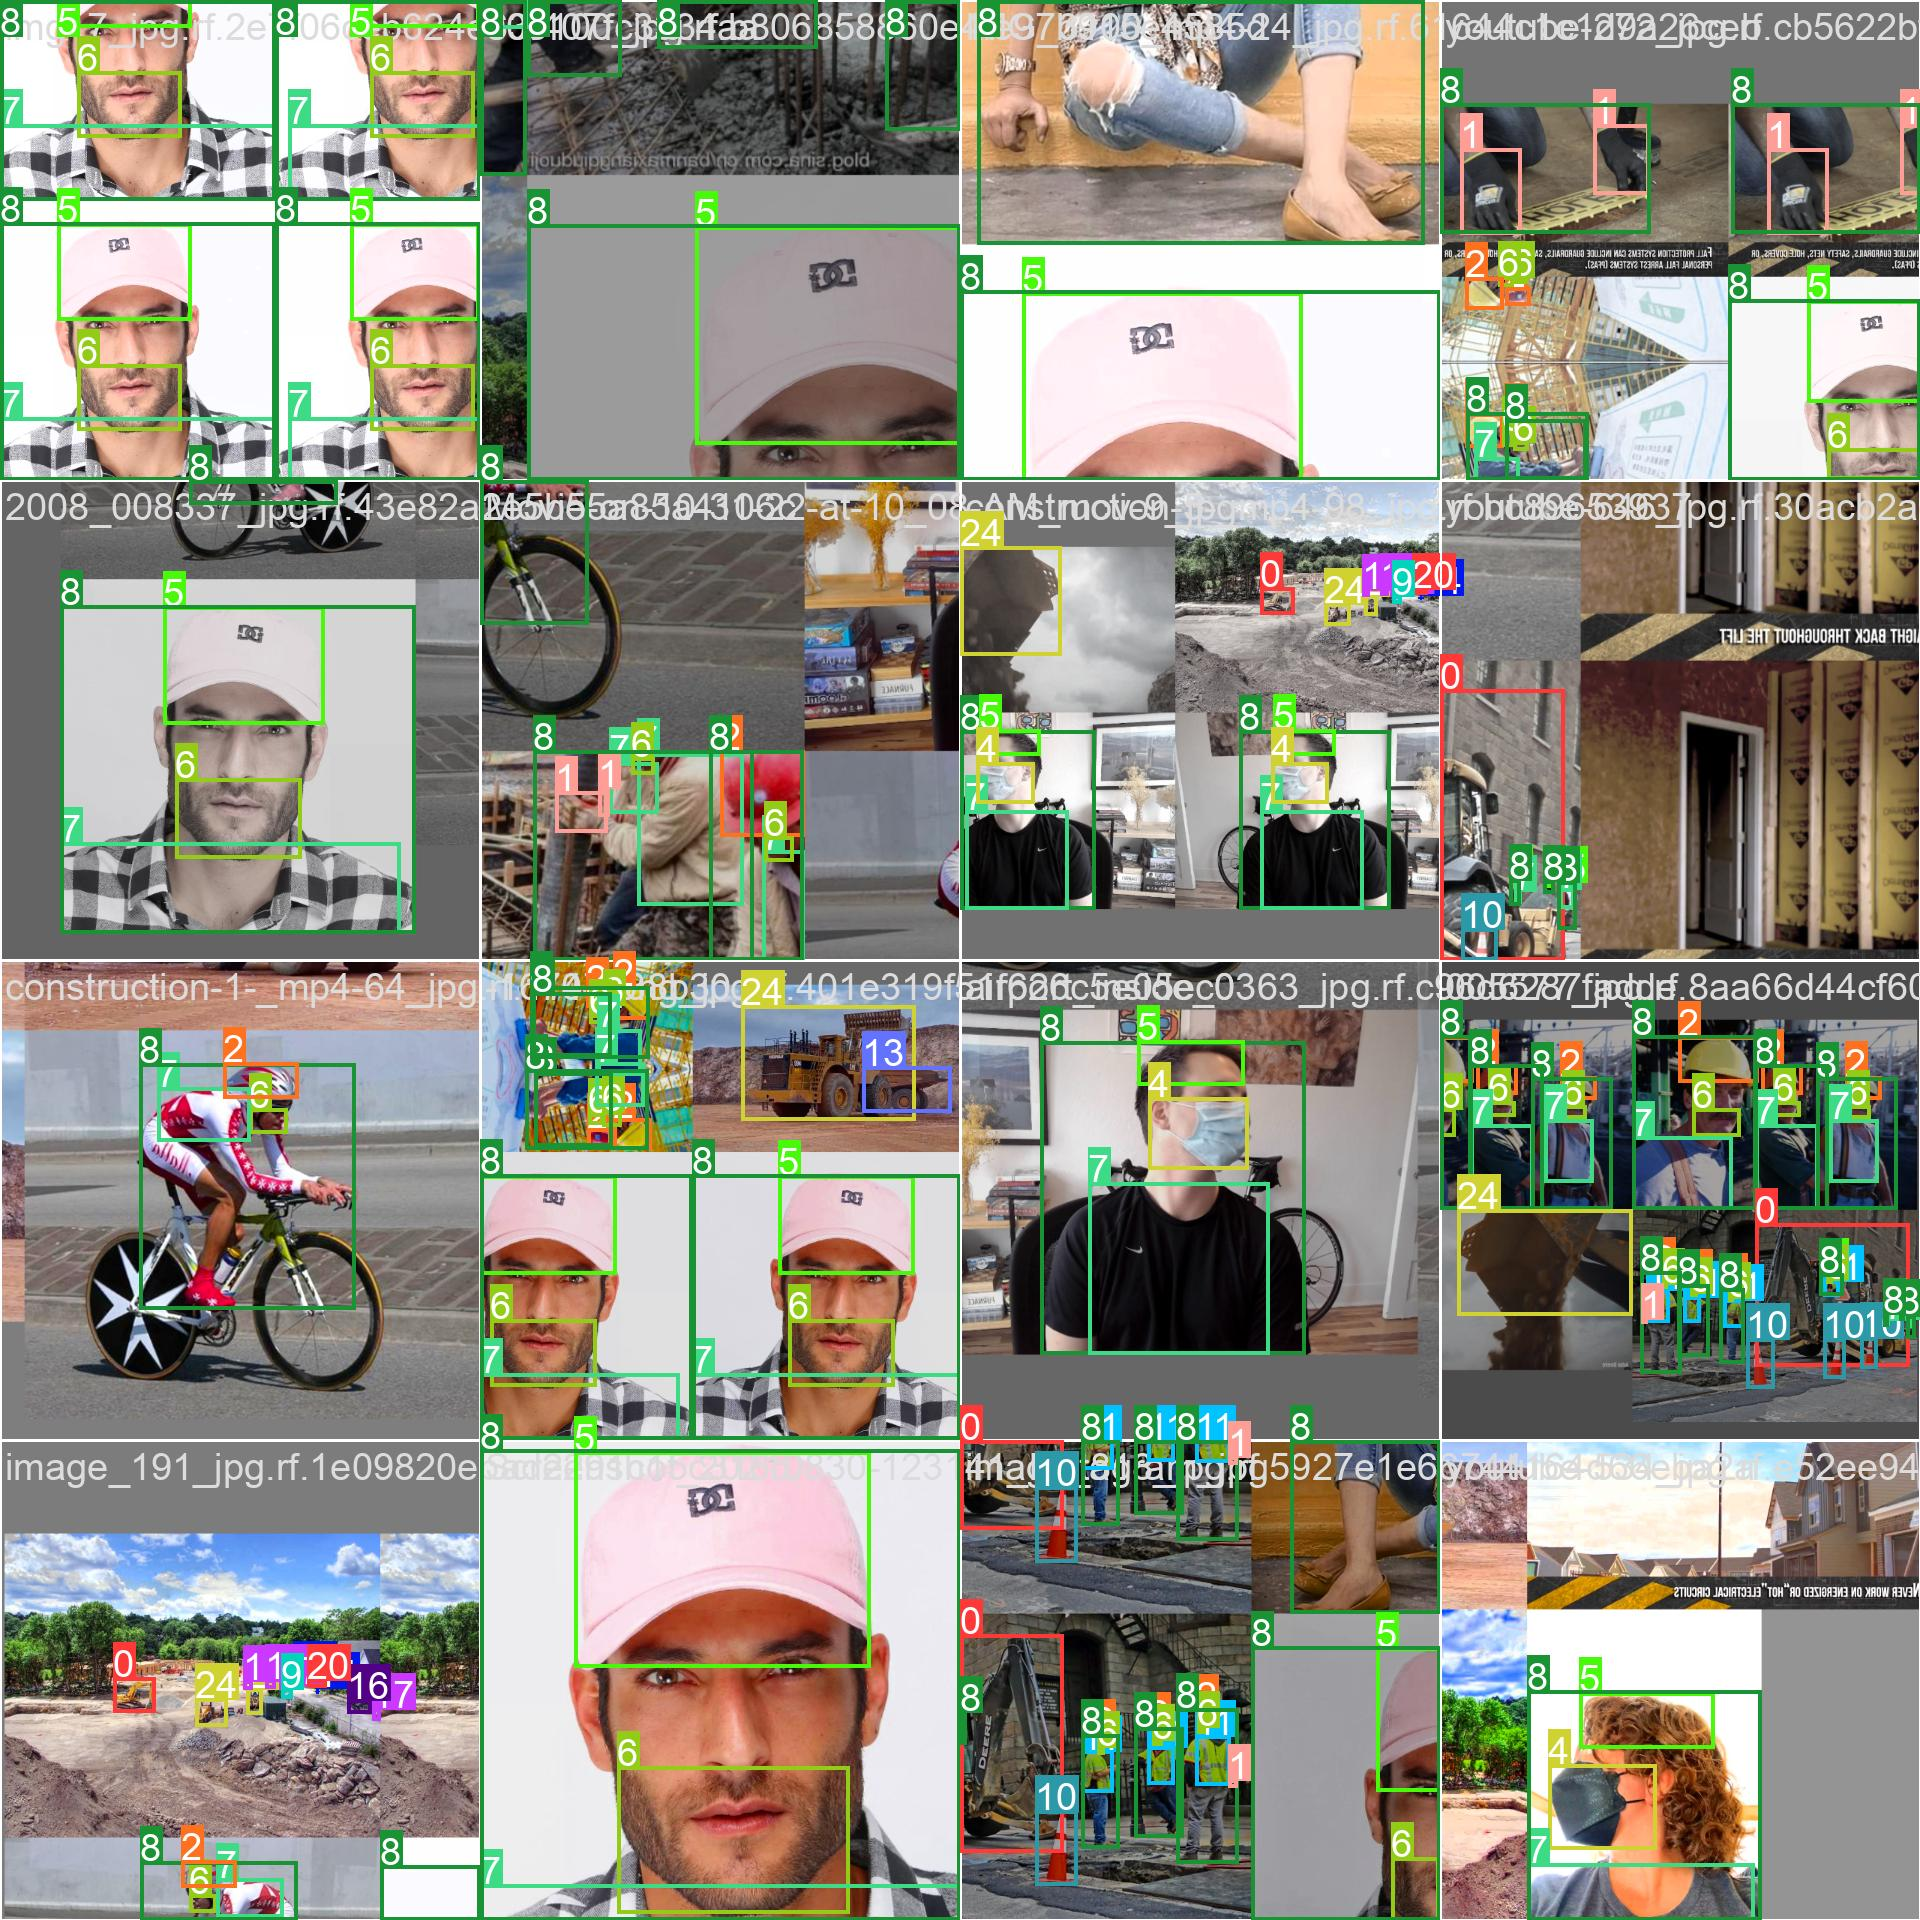

In [4]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/kaggle/working/runs/detect/train/train_batch0.jpg', width=900)

In [5]:
# trained weights are saved by default in our weights folder
%ls runs/

detect/


In [6]:
%ls /kaggle/working/runs/detect/train/weights

best.pt  last.pt


In [7]:
# %cd /content/yolov5/
!python detect.py --weights /kaggle/working/runs/detect/train/weights/best.pt --img 640 --conf 0.4 --source /kaggle/input/dataset/test/images

python: can't open file '/kaggle/working/detect.py': [Errno 2] No such file or directory


In [8]:
!yolo predict model=/kaggle/working/runs/detect/train/weights/best.pt source='/kaggle/input/dataset/test/images'

/bin/bash: yolo: command not found


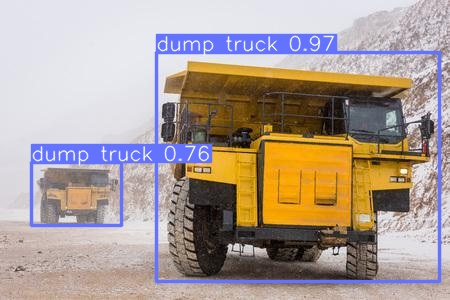

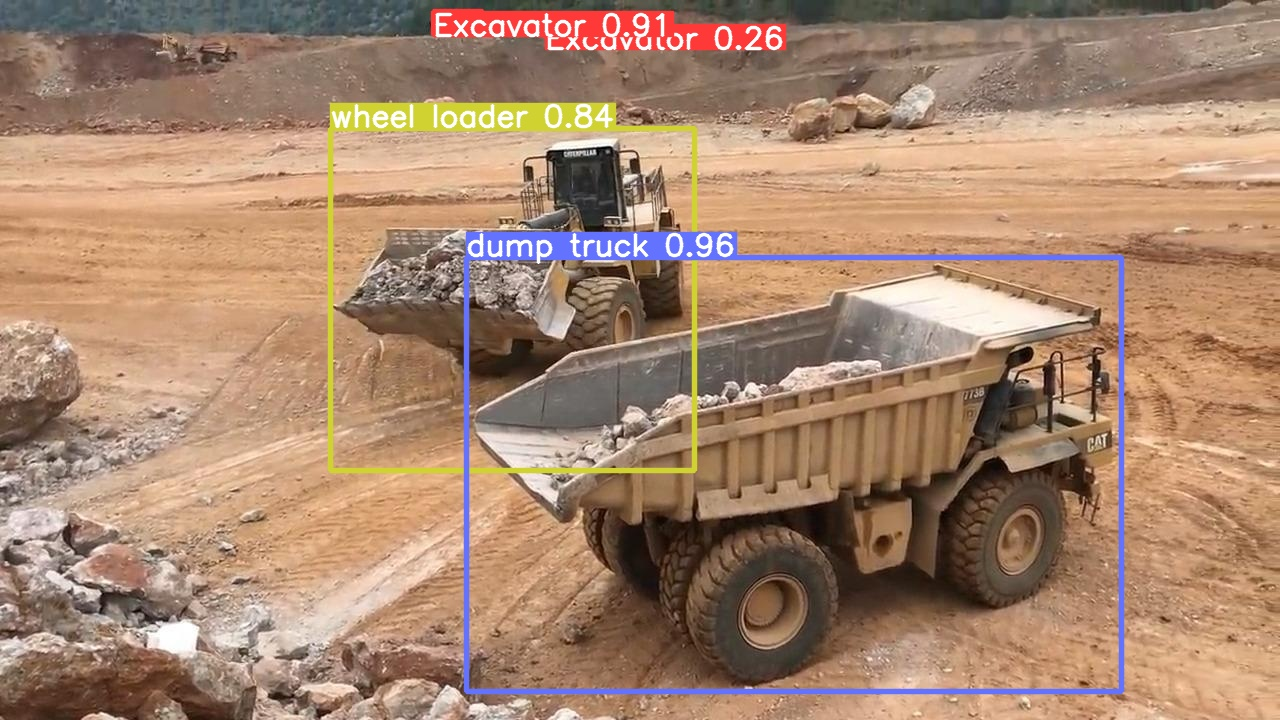

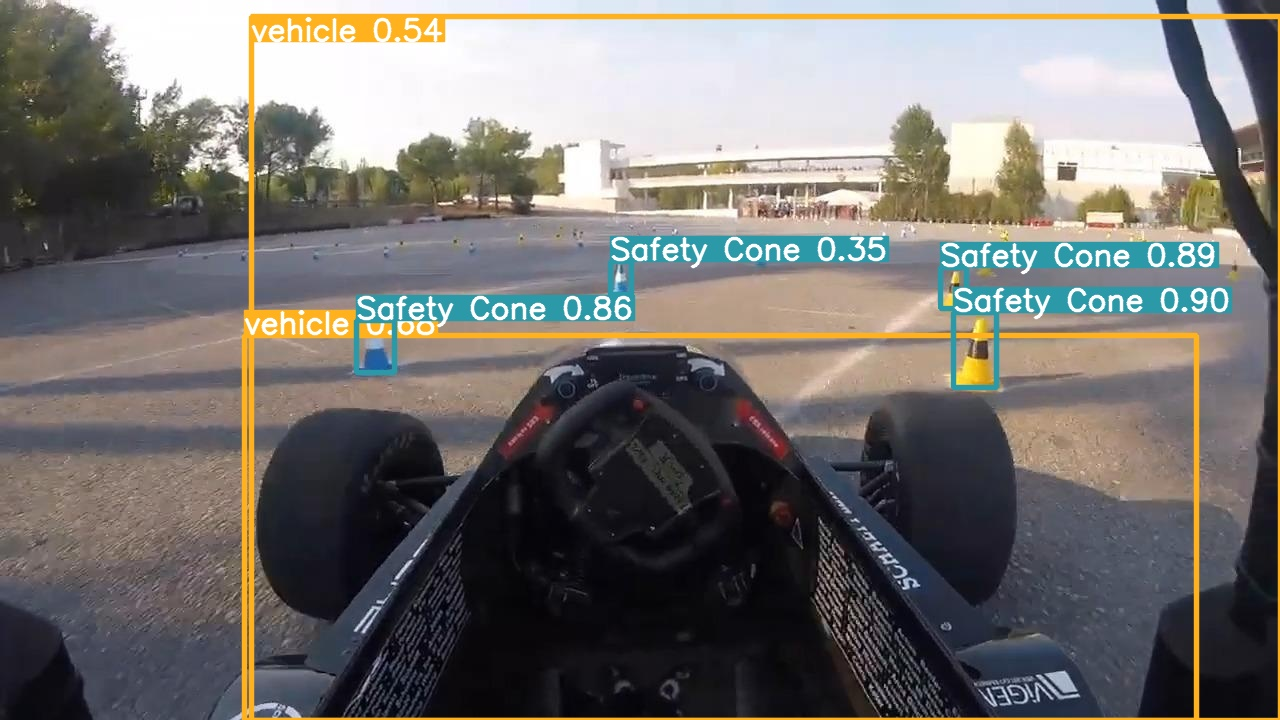

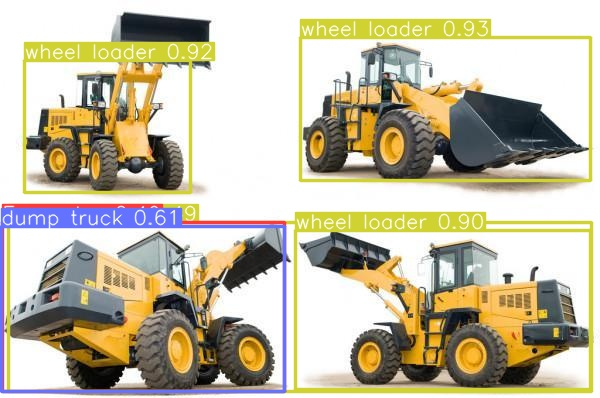

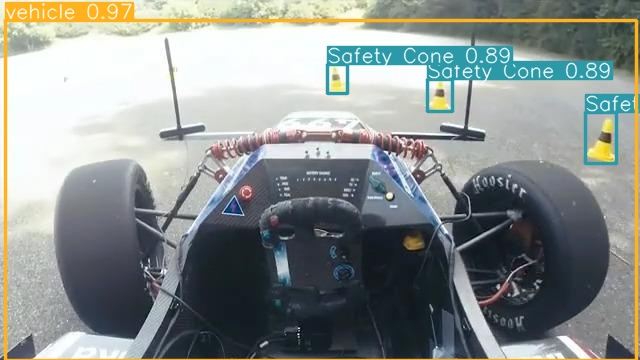

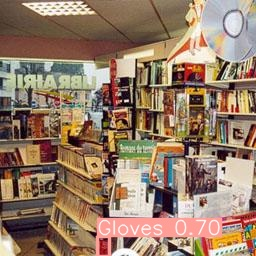

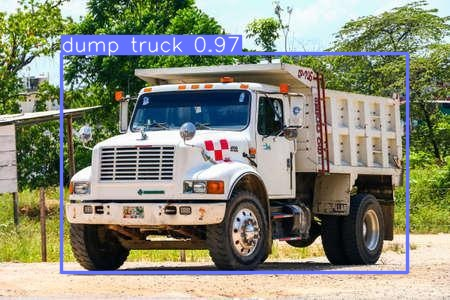

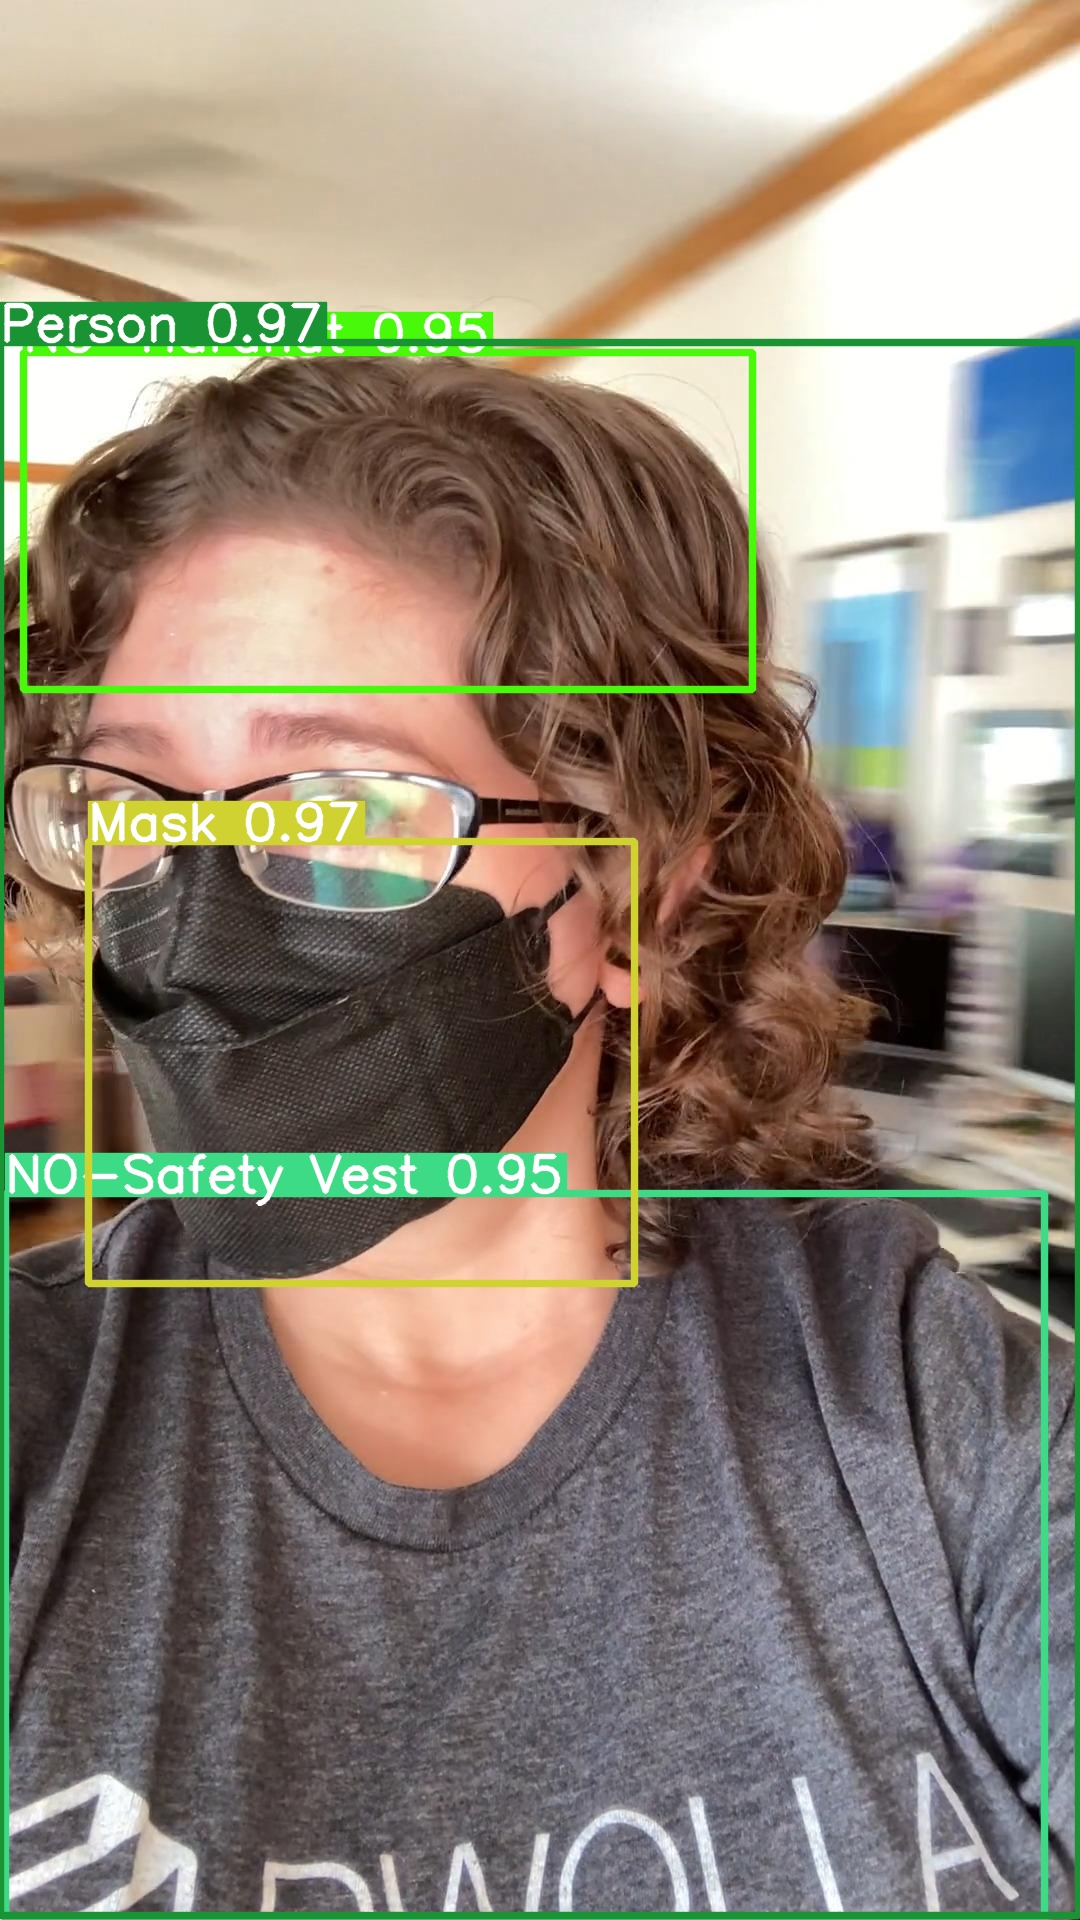

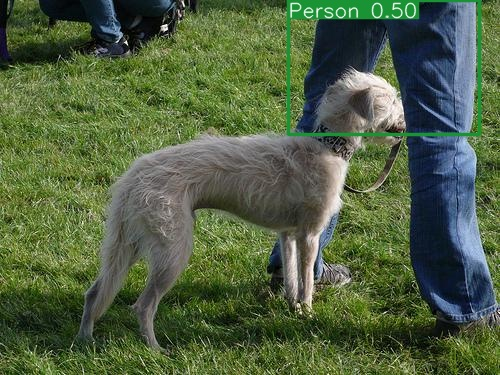

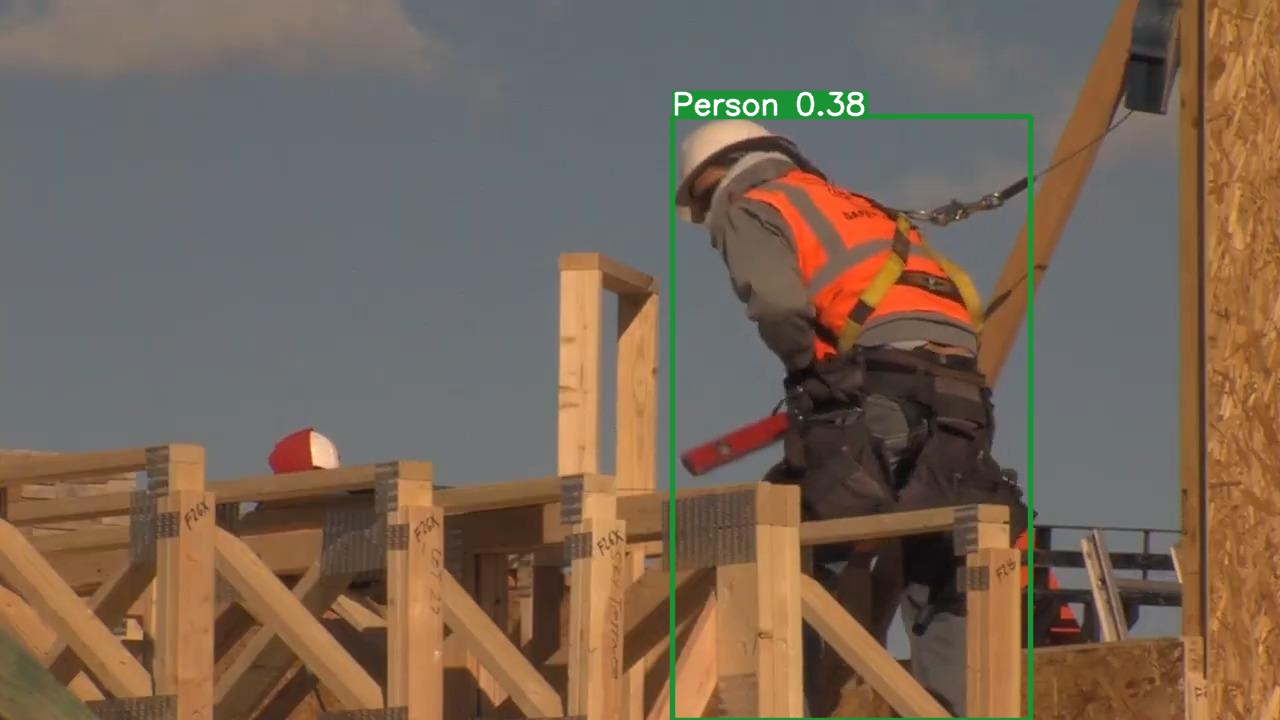

In [9]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/kaggle/working/runs/detect/predict/*.jpg')[:10]: #assuming JPG
    display(Image(filename=imageName))

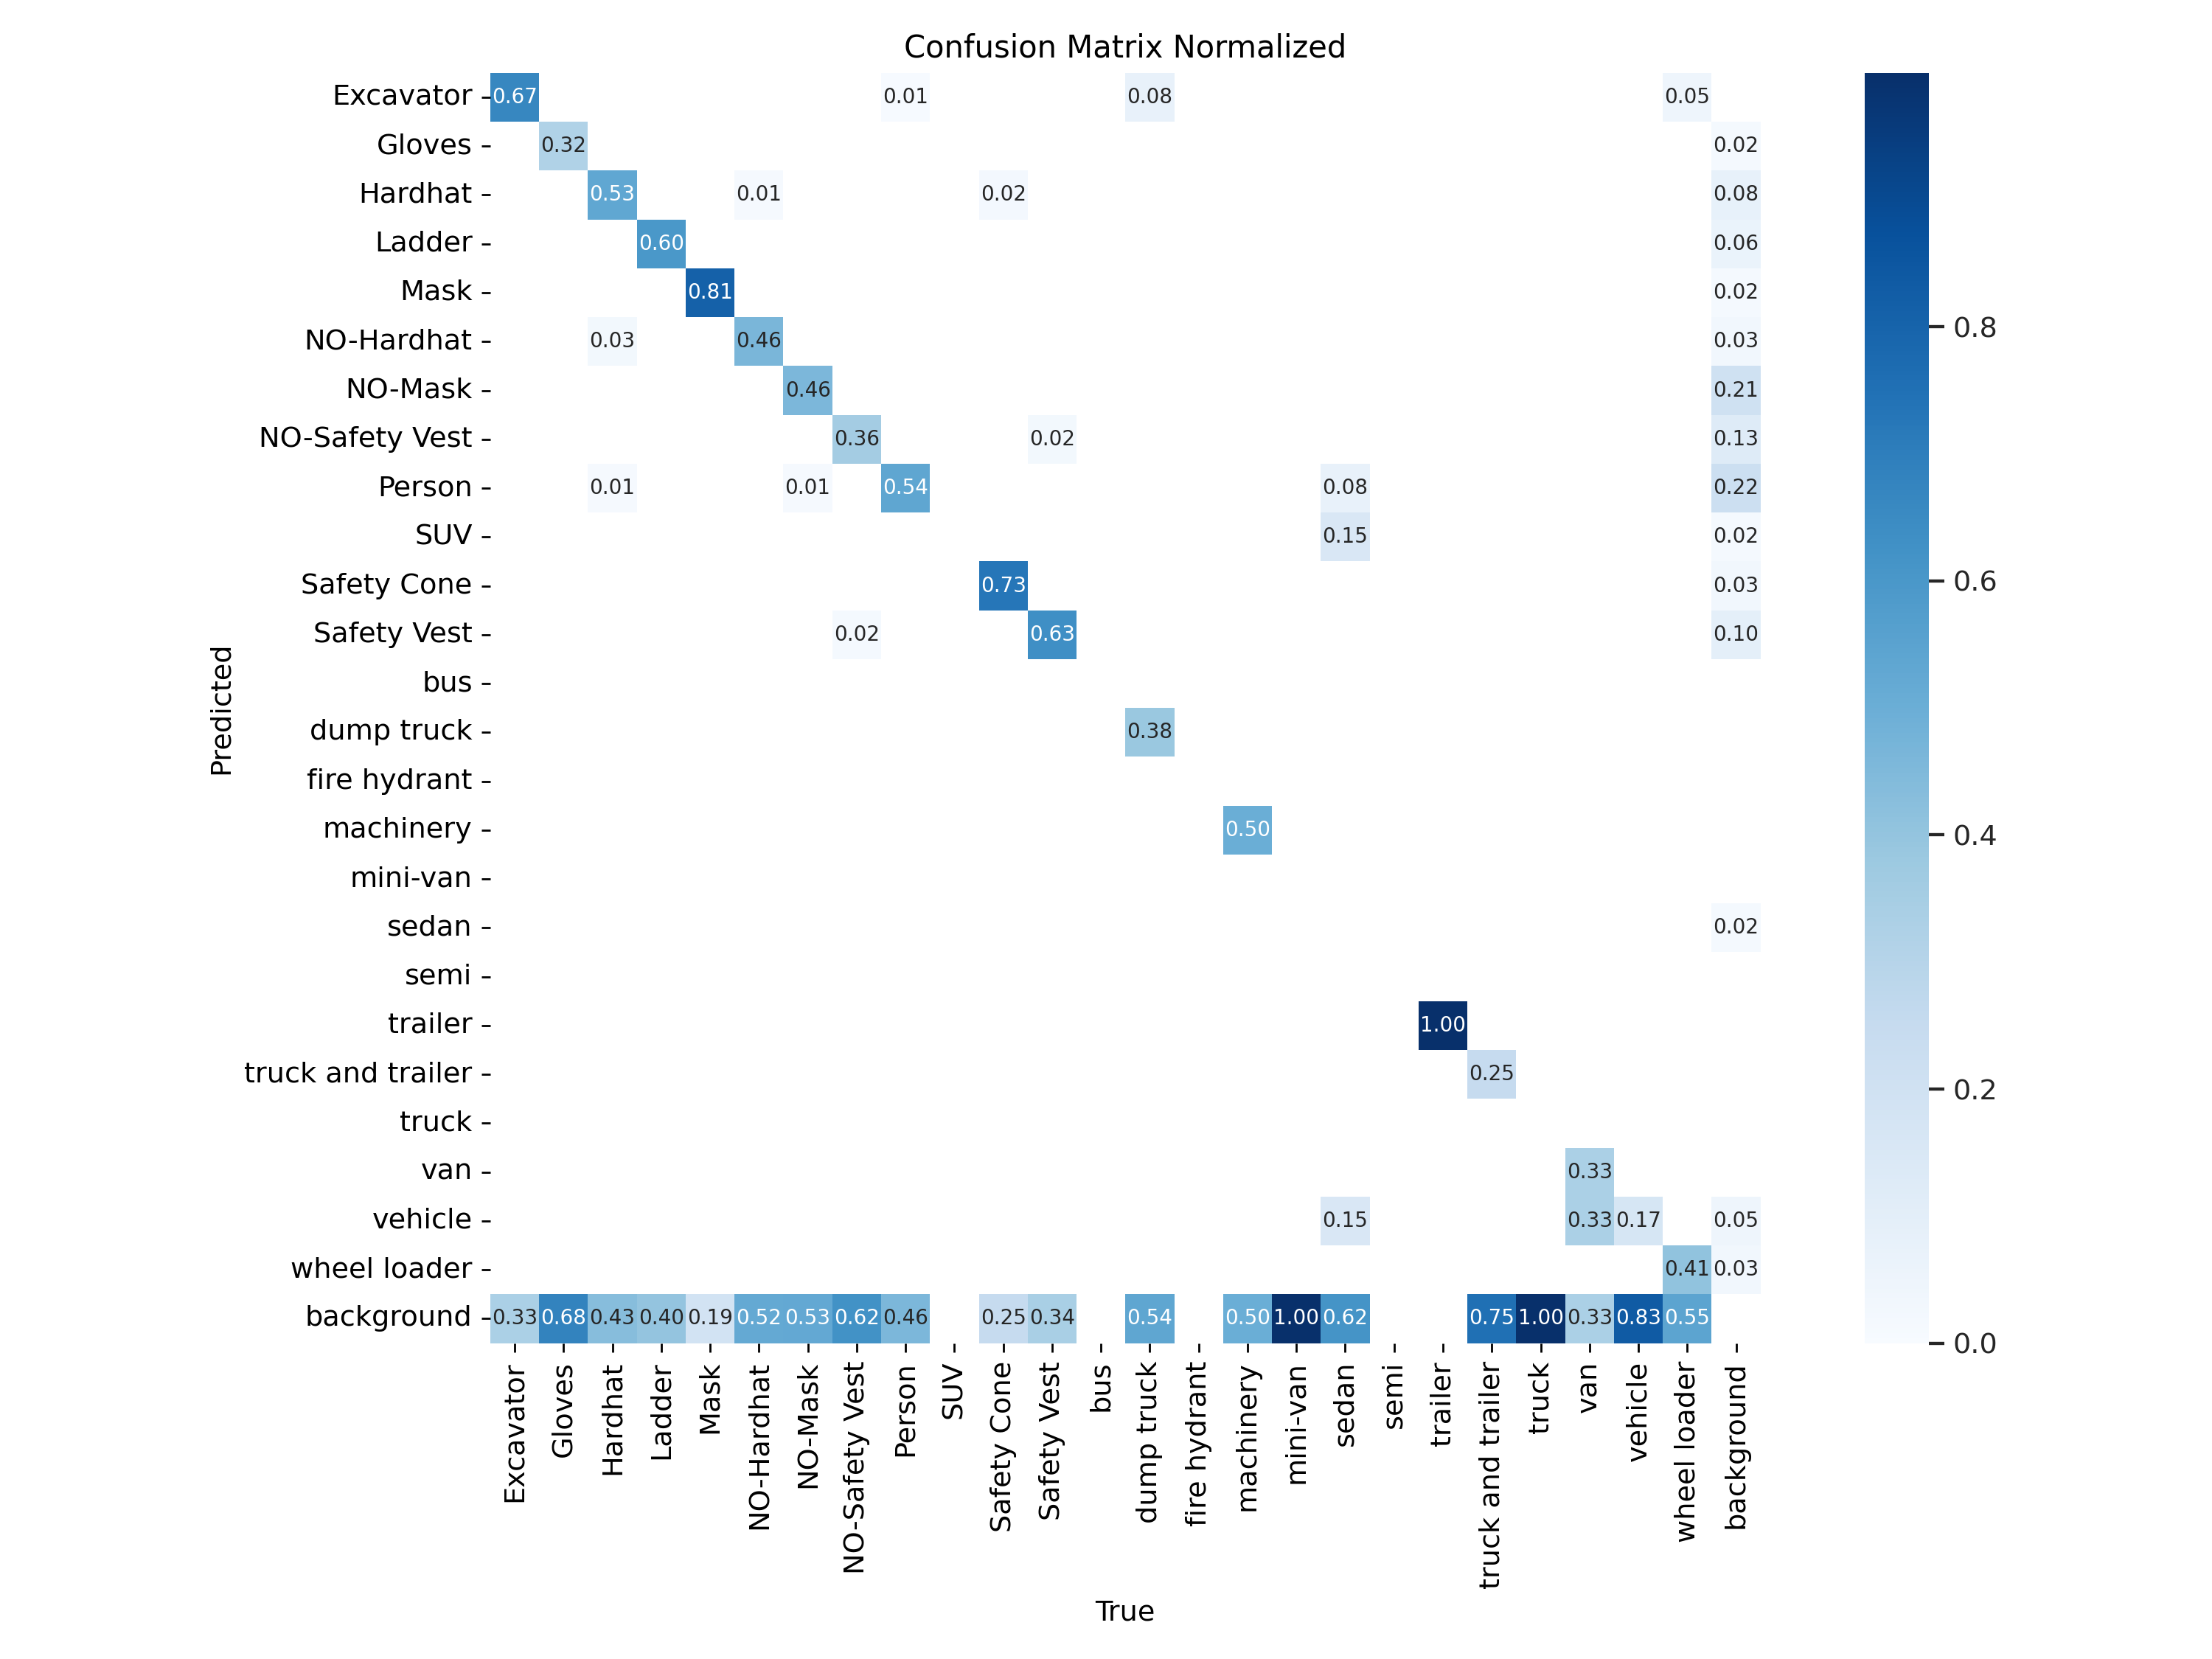

In [10]:
Image(filename='/kaggle/working/runs/detect/train/confusion_matrix_normalized.png', width=900)

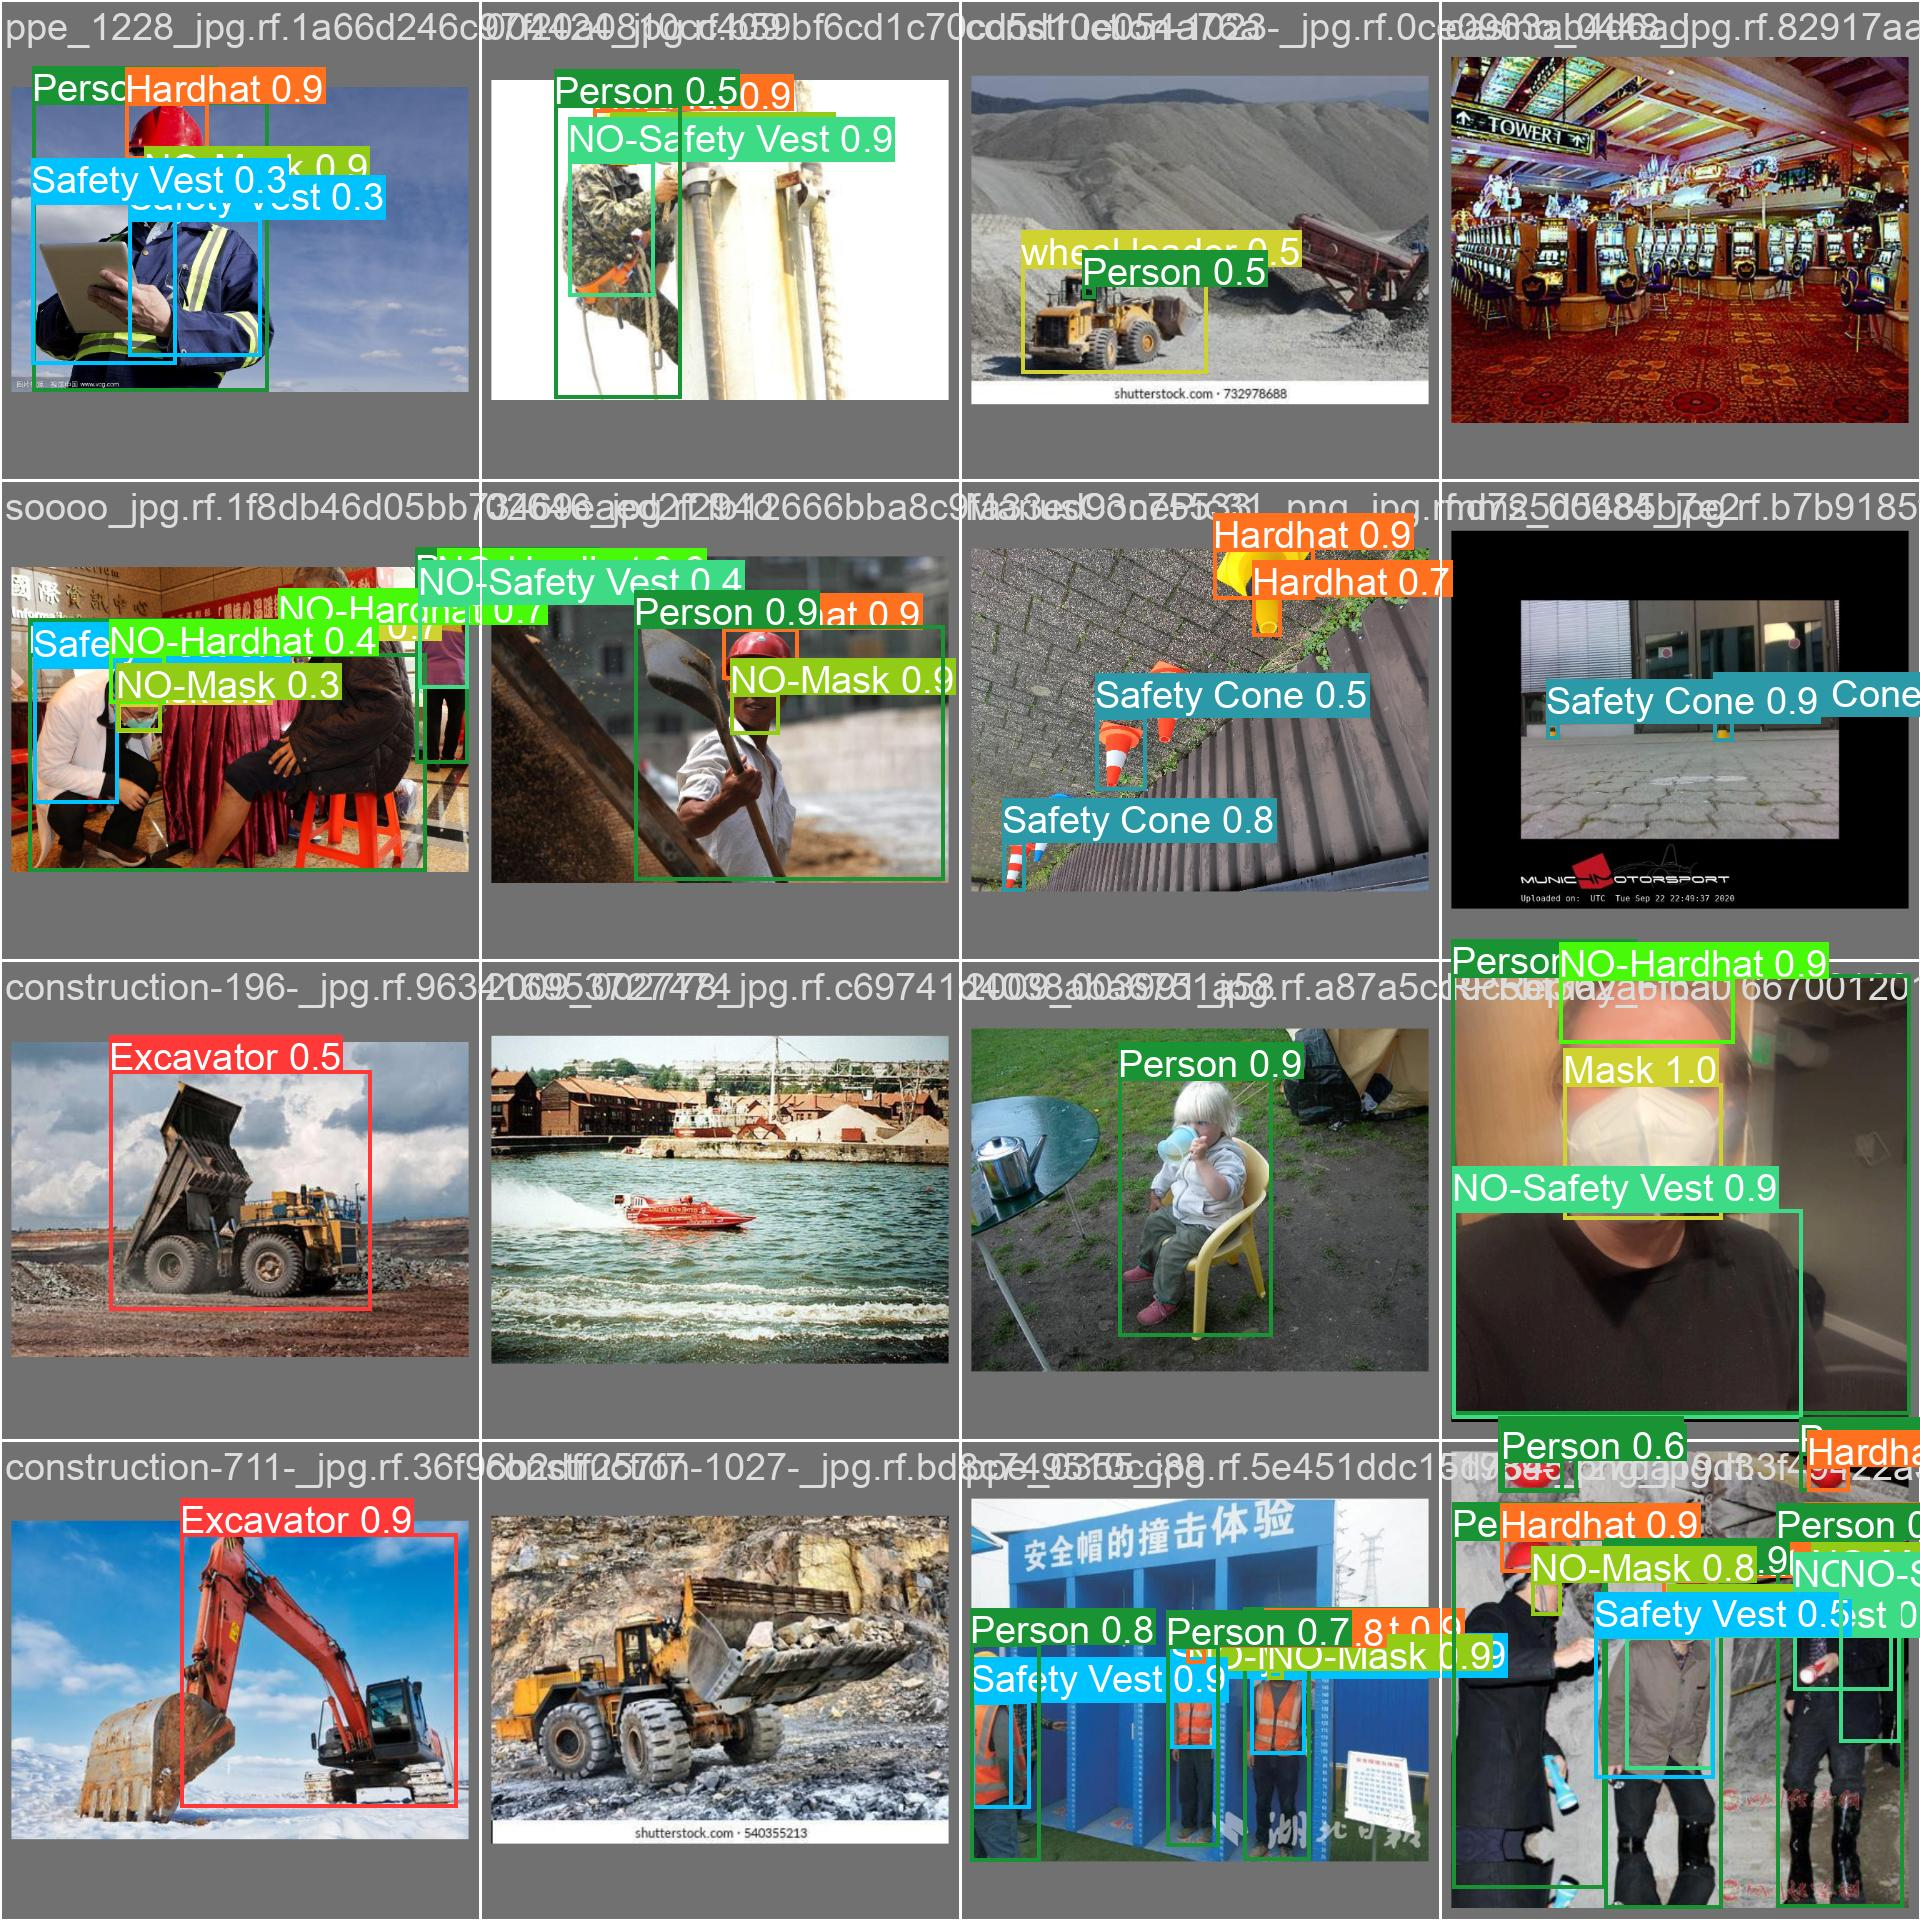

In [11]:
Image(filename='/kaggle/working/runs/detect/train/val_batch2_pred.jpg', width=900)

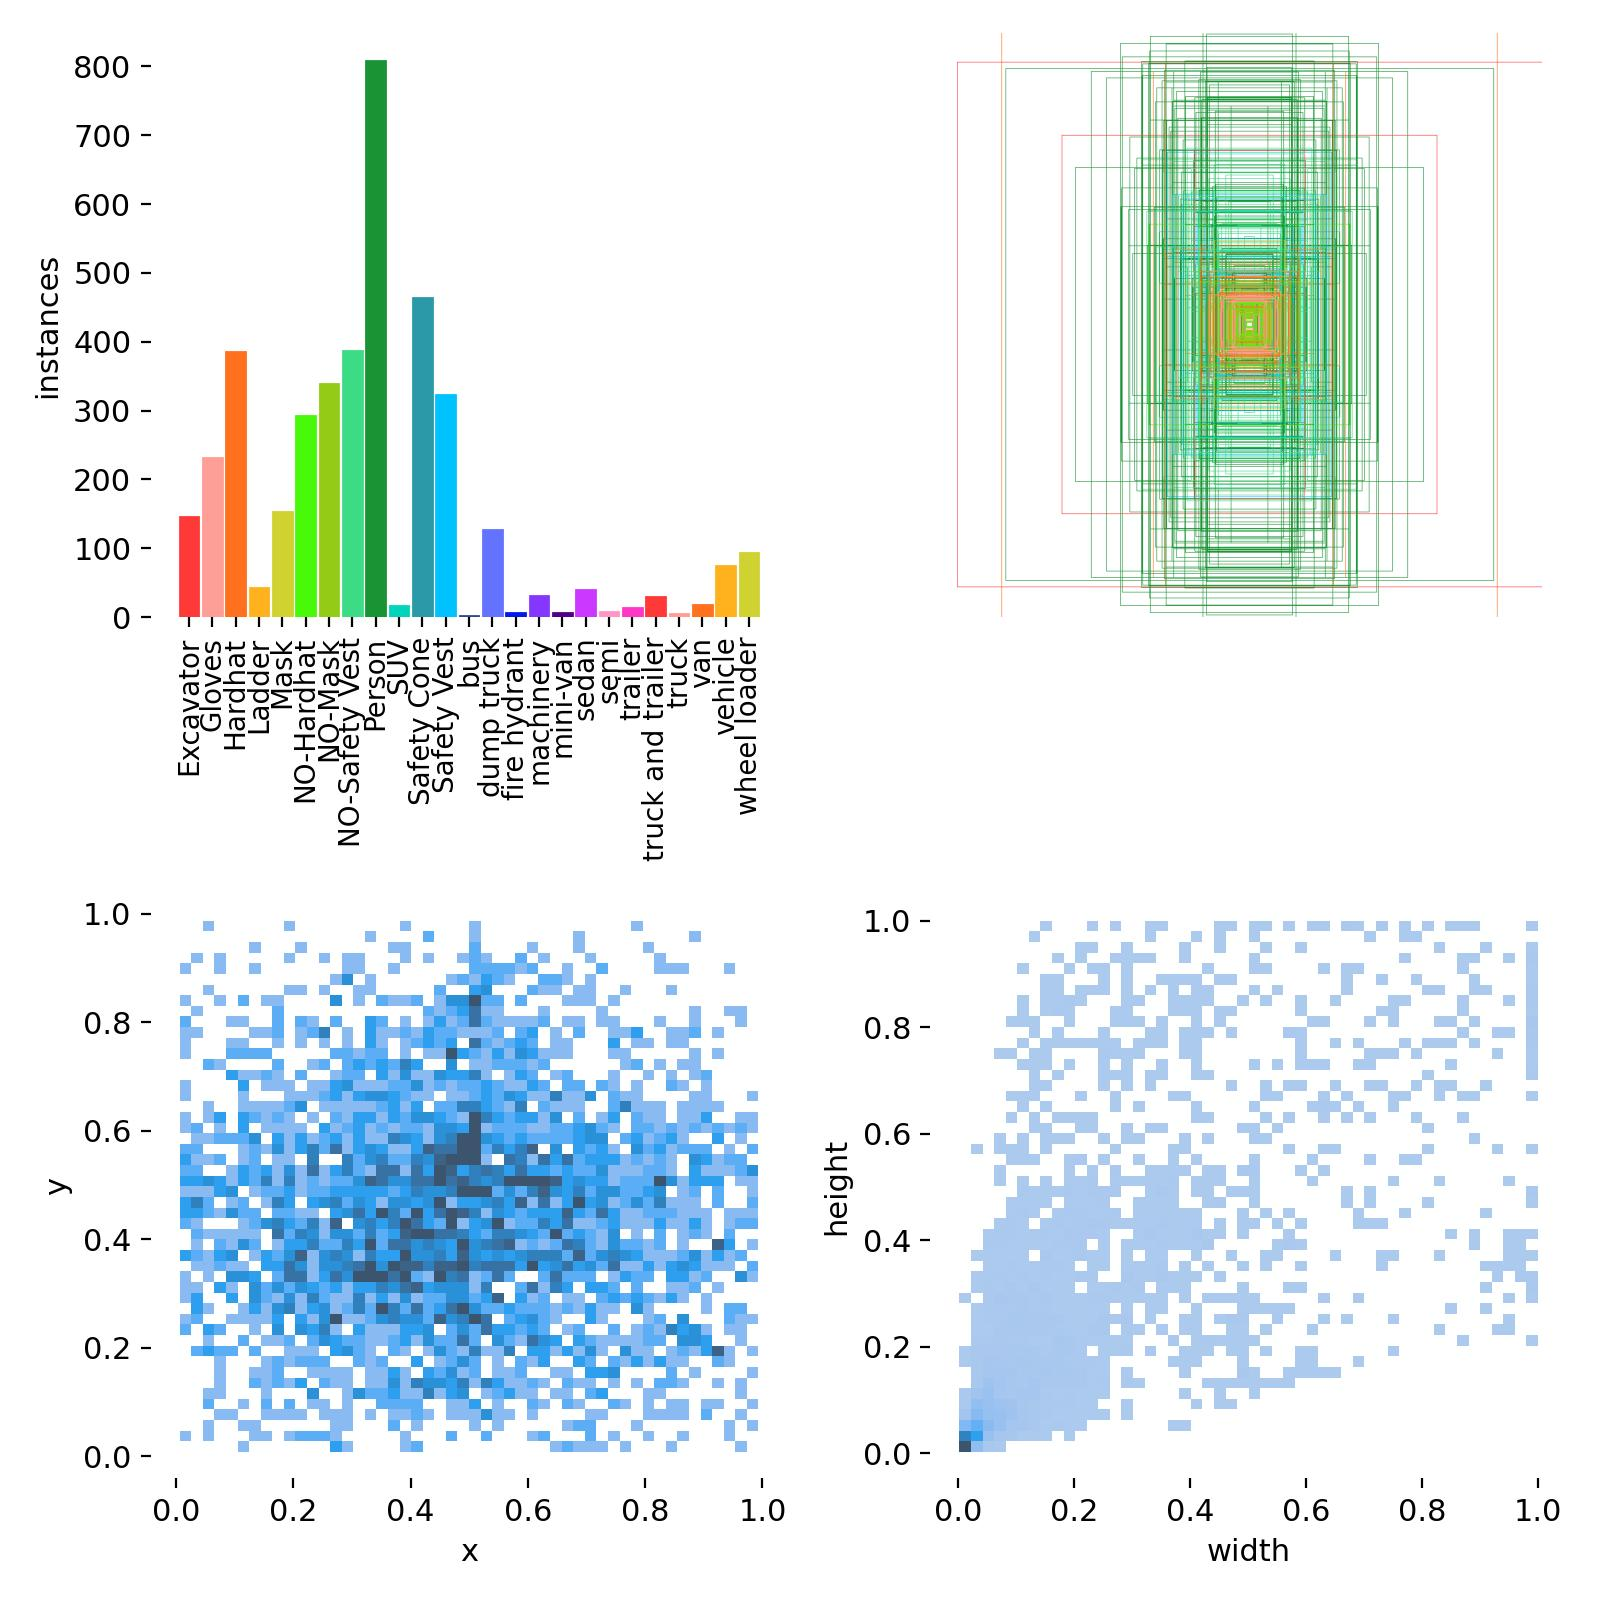

In [12]:
Image(filename='/kaggle/working/runs/detect/train/labels.jpg', width=900)

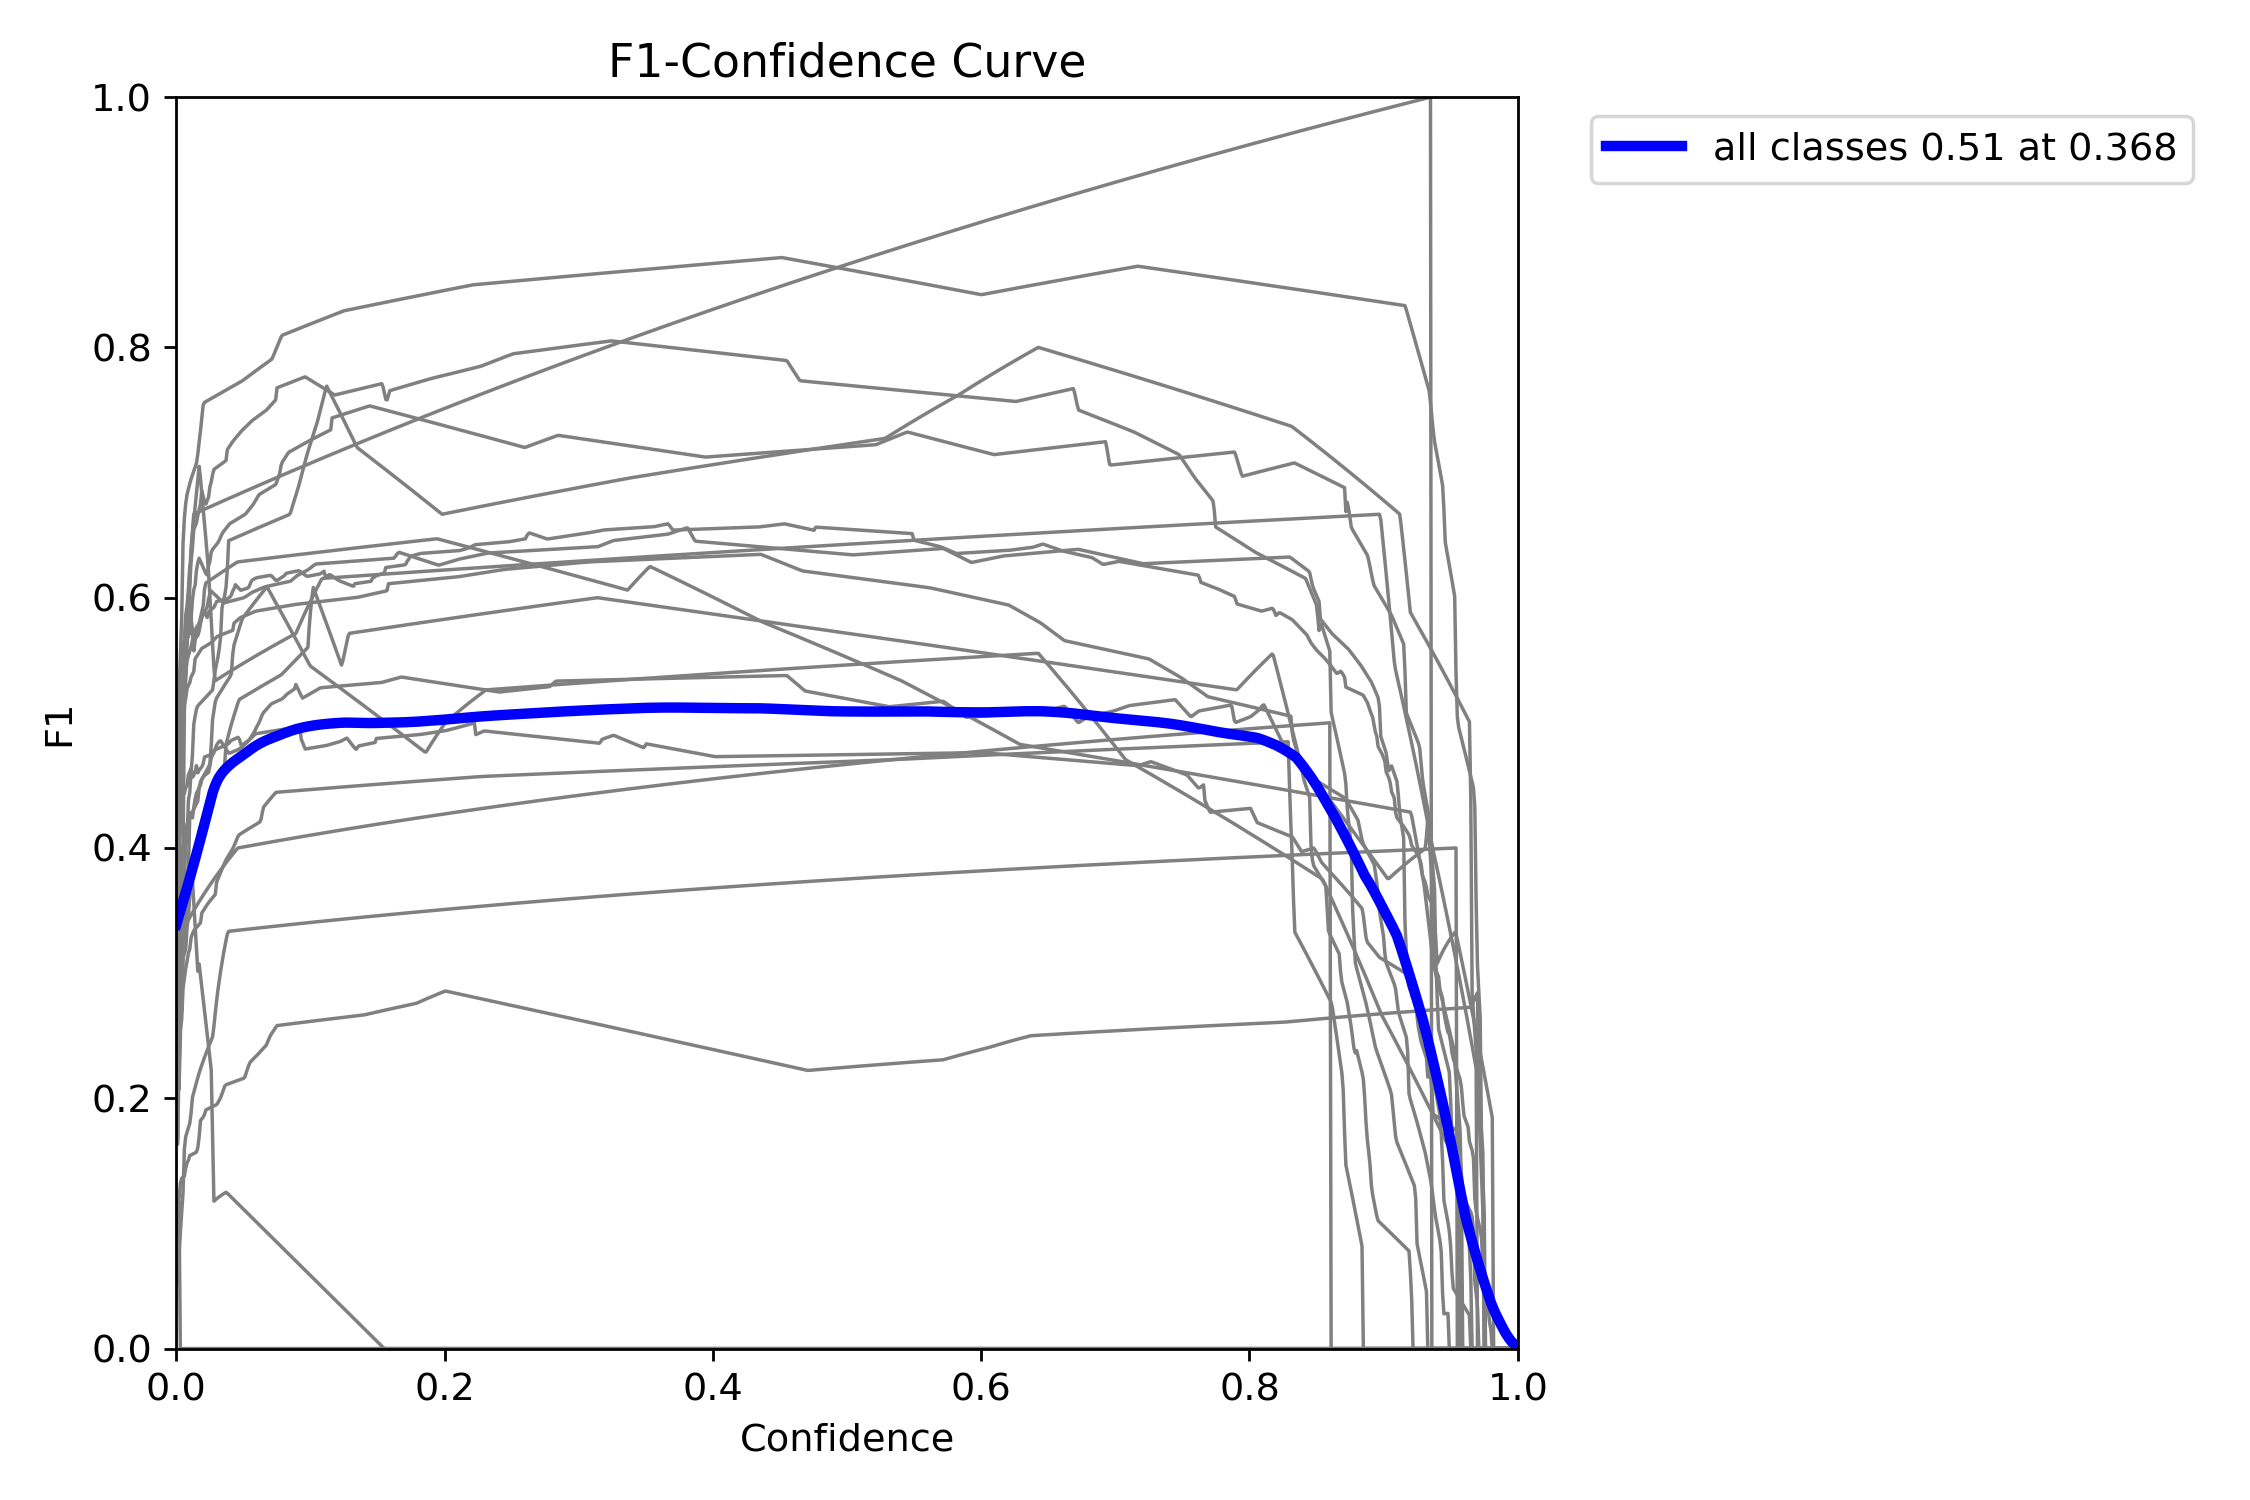

In [13]:
Image(filename='/kaggle/working/runs/detect/train/F1_curve.png', width=900)

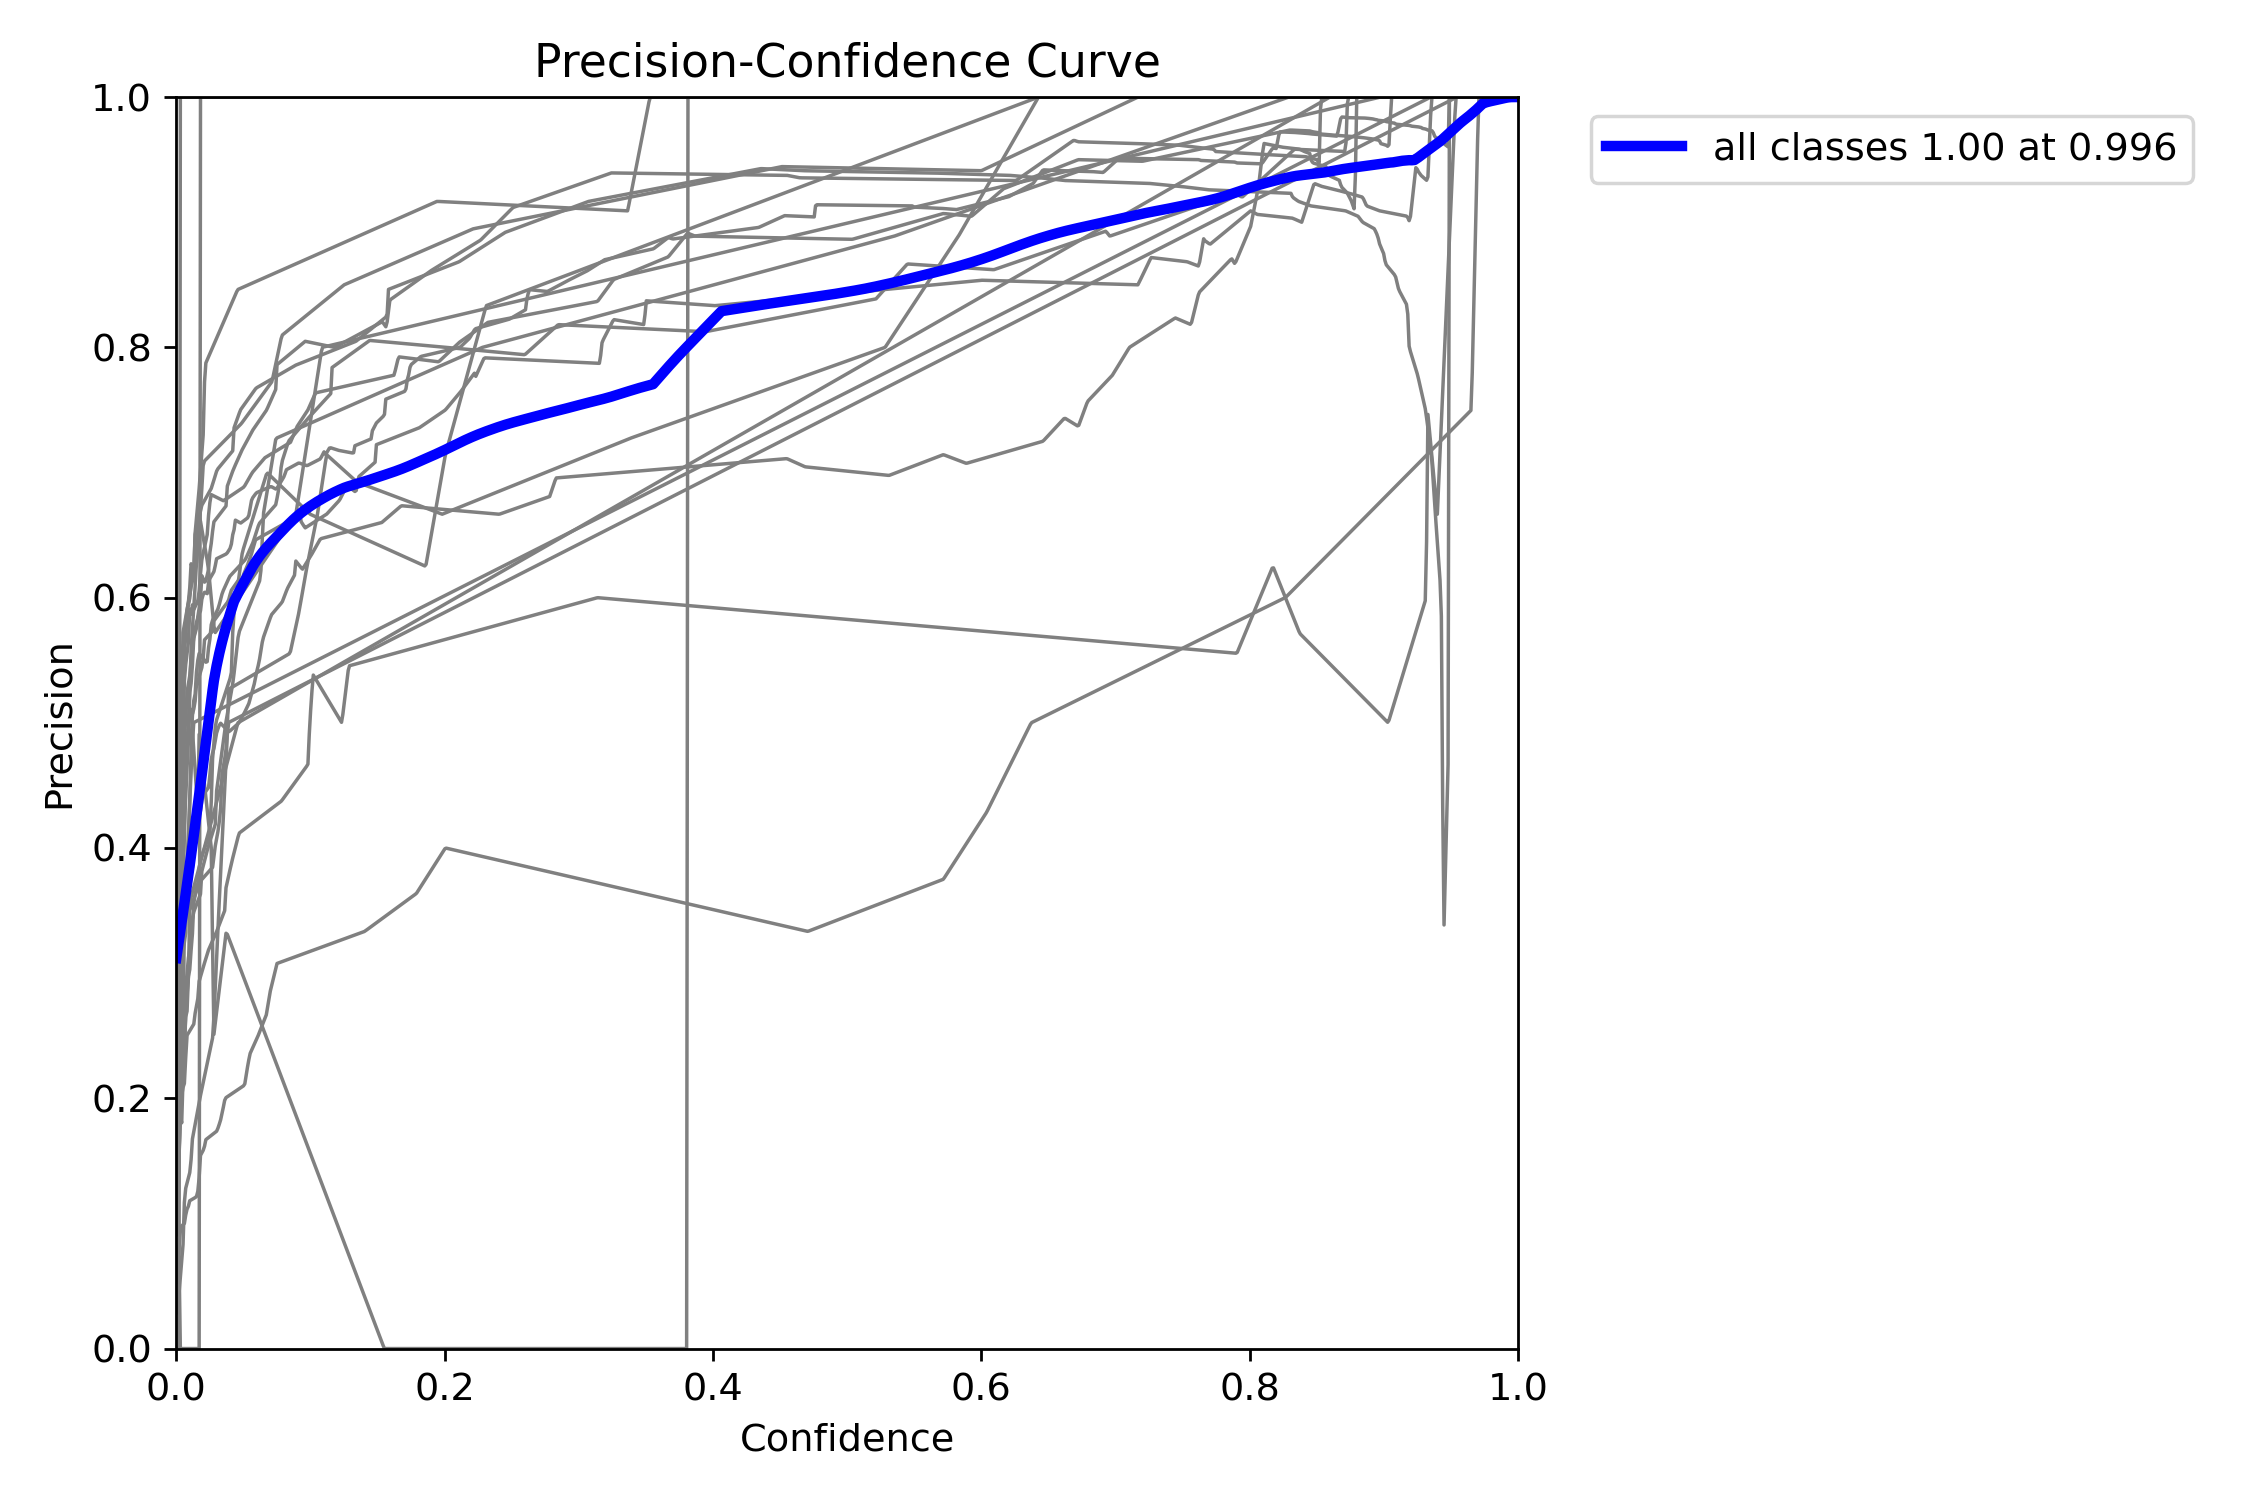

In [14]:
Image(filename='/kaggle/working/runs/detect/train/P_curve.png', width=900)

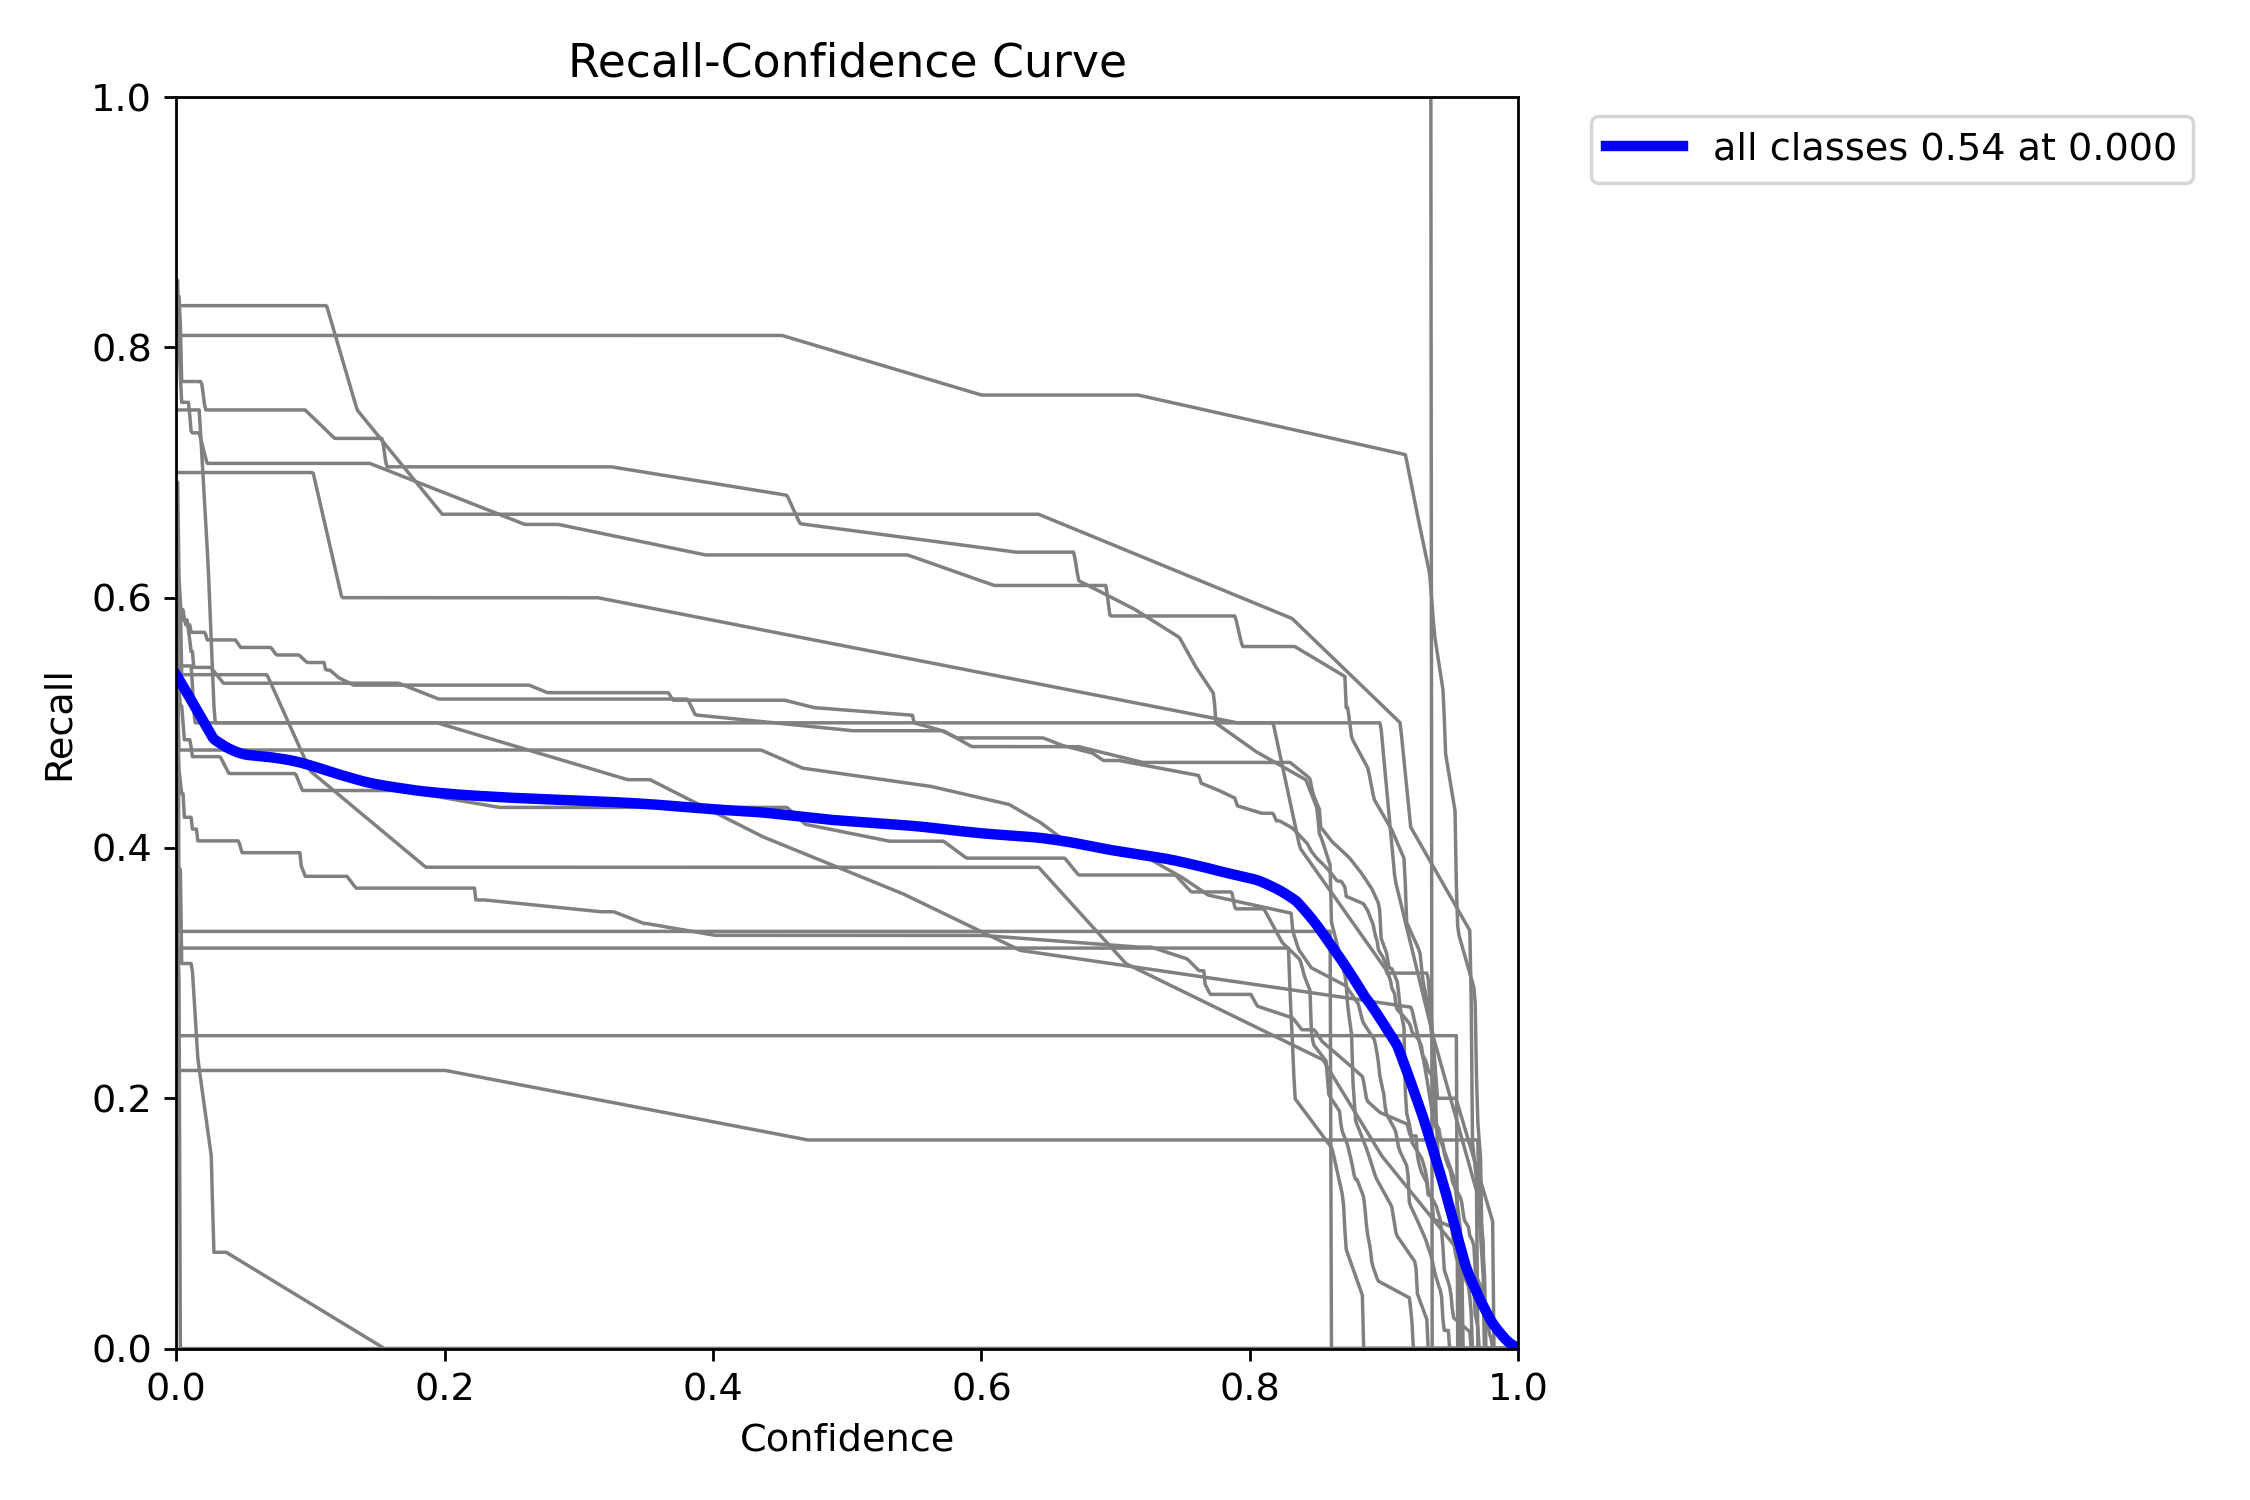

In [15]:
Image(filename='/kaggle/working/runs/detect/train/R_curve.png', width=900)

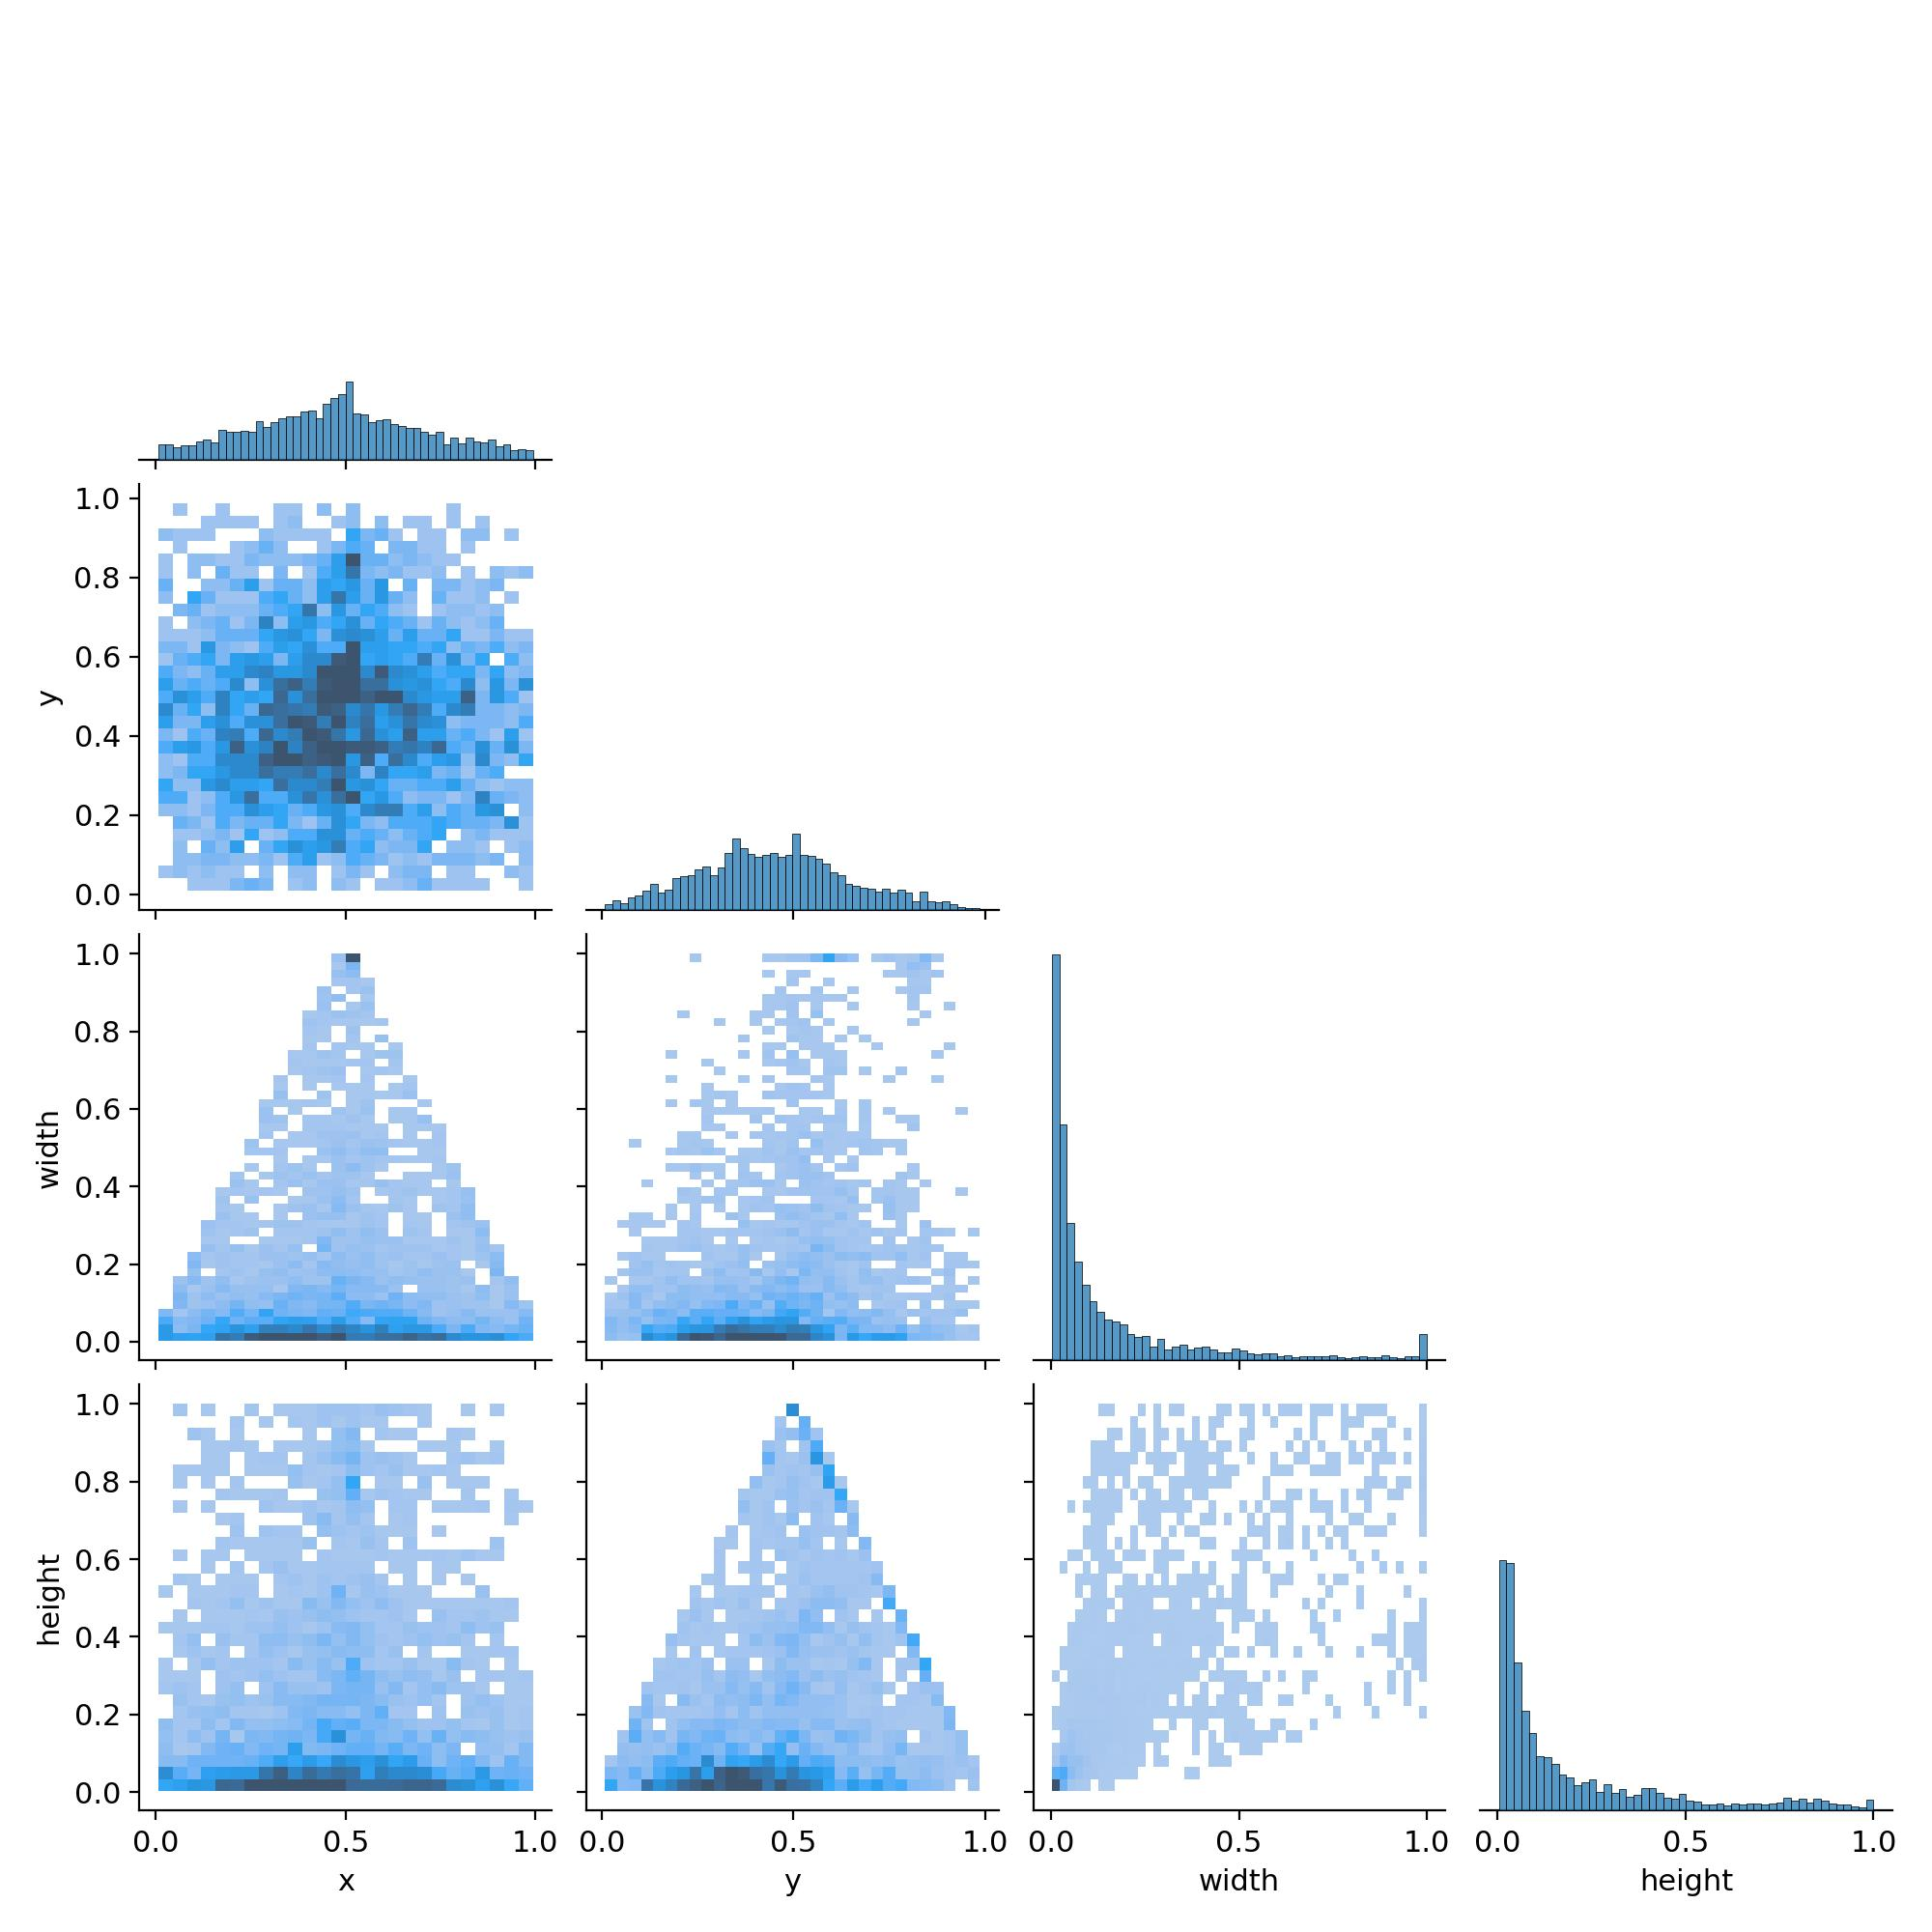

In [16]:
Image(filename='/kaggle/working/runs/detect/train/labels_correlogram.jpg', width=900)